# ÂæÆ‰ø°ËÅäÂ§©ËÆ∞ÂΩïÂàÜÊûê WeChatMsgAnalysis
## ÂáÜÂ§áÈò∂ÊÆµ
### ÂºïÂÖ•ÂåÖ
* pandas: Âü∫Á°ÄÊï∞ÊçÆÊ°ÜÊû∂
* matplotlib & seaborn: ‰∏ªË¶ÅÁªòÂõæÊ°ÜÊû∂
* jieba: ‰∏≠ÊñáÂàÜËØç
* wordcloud: ËØç‰∫ë
* paddlenlp: ÊÉÖÊÑüÂàÜÊûê

In [1]:
import re
import time
import numpy as np
import pandas as pd
import jieba
import jieba.posseg as pseg
from PIL import Image
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.transforms as mtransforms
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from tqdm import tqdm
from paddlenlp import Taskflow

D:\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### ÁªòÂõæËÆæÁΩÆ
* `font`: Â≠ó‰ΩìË∑ØÂæÑÔºåËá≥Â∞ëÊîØÊåÅ‰∏≠ÊñáÔºåÊúÄÂ•ΩÂêåÊó∂ÊîØÊåÅ‰∏≠ÊñáÂíåemoji

In [2]:
sns.set_theme(style="ticks")
font = "/usr/share/fonts/winfont/simsun.ttc"
fp = fm.FontProperties(fname=font)
plt.rcParams["axes.unicode_minus"] = False

### ‰∫∫ÂêçÊ†áÁ≠æ

In [3]:
labels = ["Bill", "Vivian"]

### Êï∞ÊçÆËØªÂèñ
* `filePath`: Ê∂àÊÅØËÆ∞ÂΩïÊñá‰ª∂ÁöÑË∑ØÂæÑ
* `dStart`: ÂºÄÂßãÁöÑÊó∂Èó¥
* `dEnd`: ÁªìÊùüÁöÑÊó∂Èó¥

In [4]:
filePath = "msg.csv"
dStart = "2023-04-07 00:00:00"
dEnd = "2024-04-05 23:59:59"

In [5]:
df = pd.read_csv(filePath, encoding="utf-8")

df = df.query(
    "CreateTime >= {:d} and CreateTime <= {:d}".format(
        int(time.mktime(time.strptime(dStart, "%Y-%m-%d %H:%M:%S"))),
        int(time.mktime(time.strptime(dEnd, "%Y-%m-%d %H:%M:%S"))),
    )
)

df["StrTime"] = pd.to_datetime(df["StrTime"])
df["day"] = df["StrTime"].dt.dayofweek
df["hour"] = df["StrTime"].dt.hour
df["Count"] = 1

dfs = [df.query("IsSender == 0"), df.query("IsSender == 1")]

### Ê∂àÊÅØËøáÊª§

In [6]:
def textFilter(text: str):
    text = text.lower()
    # try:
    #     co = re.compile("[\U00010000-\U0010ffff]")
    # except re.error:
    #     co = re.compile("[\uD800-\uDBFF][\uDC00-\uDFFF]")
    # text = co.sub(" ", text)
    co = re.compile("\[[\u4e00-\u9fa5]+\]")
    return co.sub(" ", text)

### Ëé∑ÂèñÊñáÊú¨Ê∂àÊÅØ

In [7]:
texts = [
    [textFilter(i) for i in dfs[0].query("Type == 1")["StrContent"].to_list()],
    [textFilter(i) for i in dfs[1].query("Type == 1")["StrContent"].to_list()],
]

## Ê∂àÊÅØÈ¢ëÁéáÂàÜÊûê
### Á±ªÂûãÂàÜÊûê
Ê†πÊçÆÊ∂àÊÅØÁöÑÁ±ªÂûãËøõË°åÂàÜÁ±ªÔºåÂèØ‰ª•ÁúãÂá∫ÂñúÊ¨¢ÂèëÈÄÅÁöÑÊ∂àÊÅØÁ±ªÂûãÔºåÂêåÊó∂‰πüÂèØ‰ª•ÁúãÂá∫Ë∞ÅÂèëÁöÑÂ§ö
* 1 = Text
* 3 = Image
* 34 = Voice
* 43 = Video
* 47 = Sticker
* 48 = Location
* 10000 = System

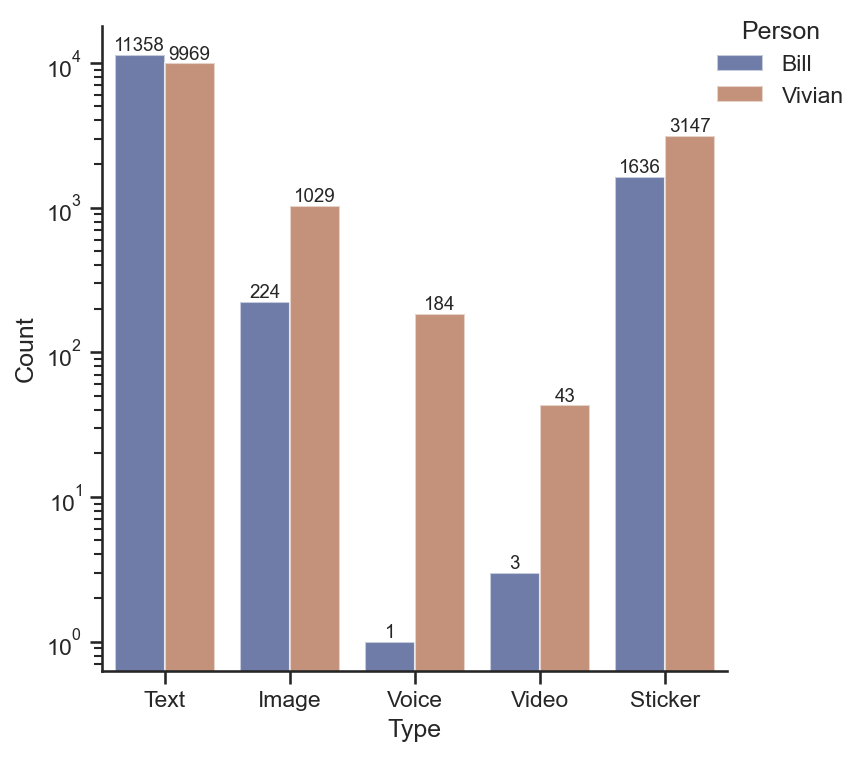

In [8]:
data = {}
for i in range(2):
    data[labels[i]] = [
        len(dfs[i].query("Type == 1")),
        len(dfs[i].query("Type == 3")),
        len(dfs[i].query("Type == 34")),
        len(dfs[i].query("Type == 43")),
        len(dfs[i].query("Type == 47")),
    ]

data = (
    pd.DataFrame(data, index=["Text", "Image", "Voice", "Video", "Sticker"])
    .reset_index()
    .melt("index")
    .rename(columns={"index": "Type", "variable": "Person", "value": "Count"})
)
g = sns.catplot(data, kind="bar", x="Type", y="Count", hue="Person", palette="dark", alpha=0.6, height=6)

for ax in g.axes.ravel():
    for i in range(2):
        ax.bar_label(ax.containers[i], fontsize=9)
sns.move_legend(g, "upper right")
plt.yscale("log")

g.figure.set_size_inches(6, 5)
g.figure.set_dpi(150)
plt.show()
plt.close()

### Ê∂àÊÅØÈïøÂ∫¶ÂàÜÊûê
* `sN`: ËÆæÁΩÆÊòæÁ§∫ËåÉÂõ¥Ôºö
$$
\mu + \mathrm{sN} * \sigma
$$
* `multiple`: Áõ¥ÊñπÂõæÂ†ÜÂè†Ê†ºÂºè

In [9]:
sN = 3
multiple = "dodge"

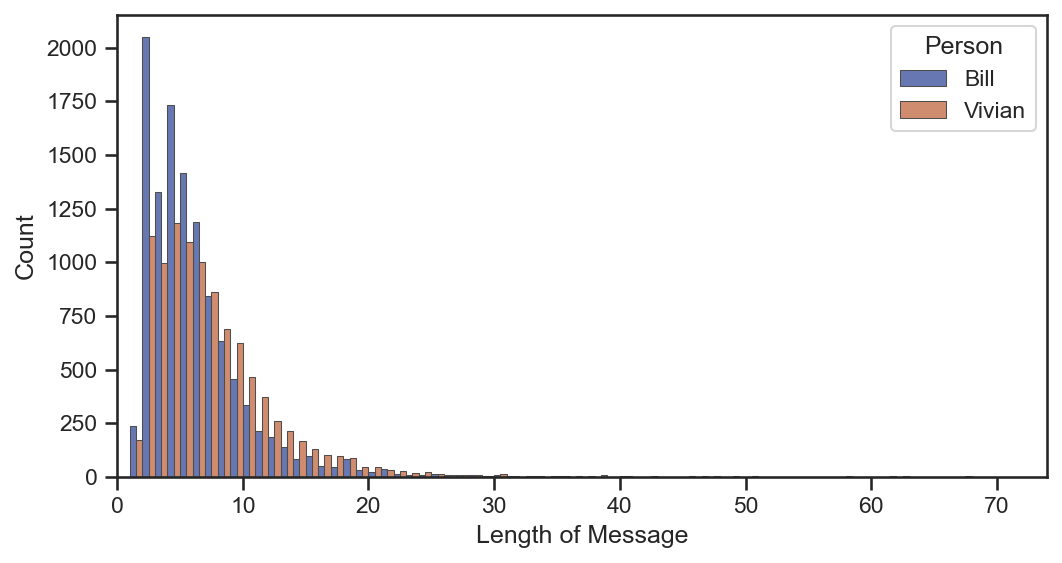

In [10]:
mu, std = 0, 0
data = {"Length": [], "Person": []}
for i in range(2):
    length = [len(textFilter(i)) for i in texts[i]]
    data["Length"] += length
    data["Person"] += [labels[i]] * len(length)
    if np.mean(length) + sN * np.std(length) > mu + std:
        mu, std = np.mean(length), np.std(length)
xlim = int(np.ceil(mu + sN * std))

data = pd.DataFrame(data)
bins = np.linspace(0, xlim, xlim + 1)

ax = sns.histplot(
    data=data,
    x="Length",
    hue="Person",
    bins=bins,
    multiple=multiple,
    edgecolor=".3",
    linewidth=0.5,
    palette="dark",
    alpha=0.6,
)
ax.set_xlim(0, xlim)
ax.set_xlabel("Length of Message")

ax.figure.set_size_inches(8, 4)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊØèÊó•Ê¥ªË∑ÉÂàÜÊûê
ÂàíÂàÜÊØèÊó•24Â∞èÊó∂ÂÜÖÊØèÂ∞èÊó∂ÂèëÈÄÅÁöÑÊ∂àÊÅØÊï∞ÔºåÂèØ‰ª•ÂæóÁü•ÊØèÂ§©ÁöÑÊ¥ªË∑ÉÁöÑÊó∂Èó¥ÊÆµ

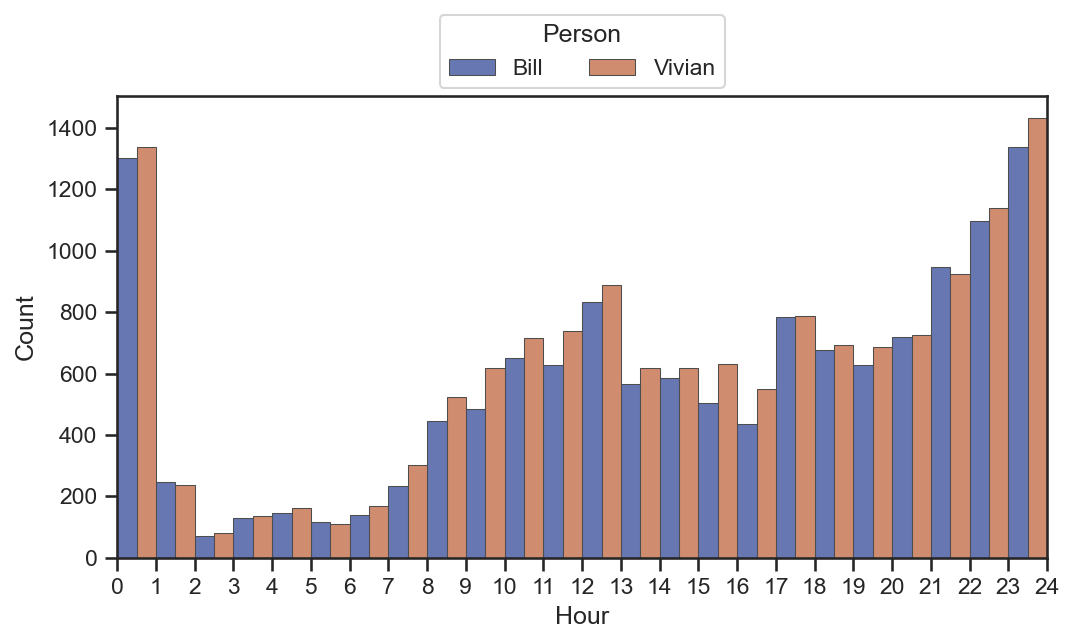

In [11]:
data = {"Time": [], "Person": []}
for i in range(2):
    hour = dfs[i]["hour"].to_list()
    data["Time"] += hour
    data["Person"] += [labels[i]] * len(hour)

data = pd.DataFrame(data)
bins = np.arange(0, 25, 1)

ax = sns.histplot(
    data=data,
    x="Time",
    hue="Person",
    bins=bins,
    multiple=multiple,
    edgecolor=".3",
    linewidth=0.5,
    palette="dark",
    alpha=0.6,
)
ax.set_xticks(bins)
ax.set_xticklabels(bins)
ax.set_xlabel("Hour")
ax.set_xlim(0, 24)
sns.move_legend(ax, loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)

ax.figure.set_size_inches(8, 4)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊØèÂë®Ê¥ªË∑ÉÂàÜÊûê
Êü•Áúã‰∏ÄÂë®ÂÜÖ‰ªéÂë®‰∏ÄÂà∞Âë®Êó•ÊØèÂ§©ÂèëÈÄÅÁöÑÊ∂àÊÅØÊï∞

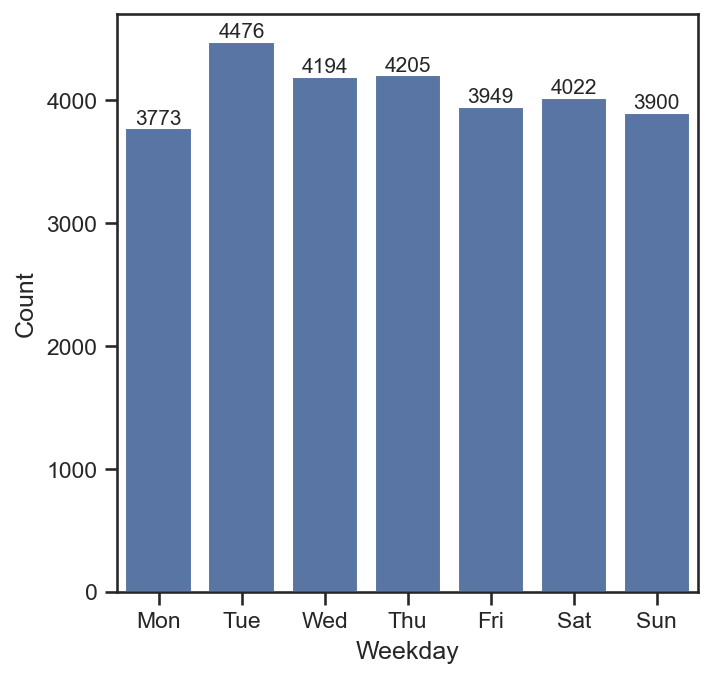

In [12]:
grouper = pd.Grouper(key="day")
data = df.groupby(grouper)["Count"].sum()
data = data.sort_index()
data.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

ax = sns.barplot(data=data, errorbar=None)
ax.set_xlabel("Weekday")
ax.bar_label(ax.containers[0], fontsize=10)

ax.figure.set_size_inches(5, 5)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊåâÂë®ÂàíÂàÜÂπ¥Â∫¶Ê¥ªË∑ÉÂàÜÊûê
ÂàíÂàÜÊØè7Â§©ÂÜÖÂèëÈÄÅÁöÑÊ∂àÊÅØÊï∞ÔºåÂèØ‰ª•ÂæóÁü•ÊØèÂë®ÁöÑÊ¥ªË∑ÉÁöÑÊó∂Èó¥ÊÆµ
* `wTicks`: ÊØè‰∏™ÂàªÂ∫¶Áõ∏Â∑ÆÁöÑÊï∞ÂÄº
* `wStart`: **ÂΩìÂπ¥**ÊàñËÄÖ**ËÅäÂ§©ÂºÄÂßãÊó•Êúü‰πãÂêé**Á¨¨‰∏Ä‰∏™Âë®‰∏ÄÁöÑÊó•Êúü
* `wEnd`: **Ê¨°Âπ¥**ÊàñËÄÖ**ËÅäÂ§©ÁªìÊùüÊó•Êúü‰πãÂêé**Á¨¨‰∏Ä‰∏™Âë®‰∏ÄÁöÑÊó•Êúü

In [13]:
wTicks = 500
wStart = "2023-04-03"
wEnd = "2024-04-01"

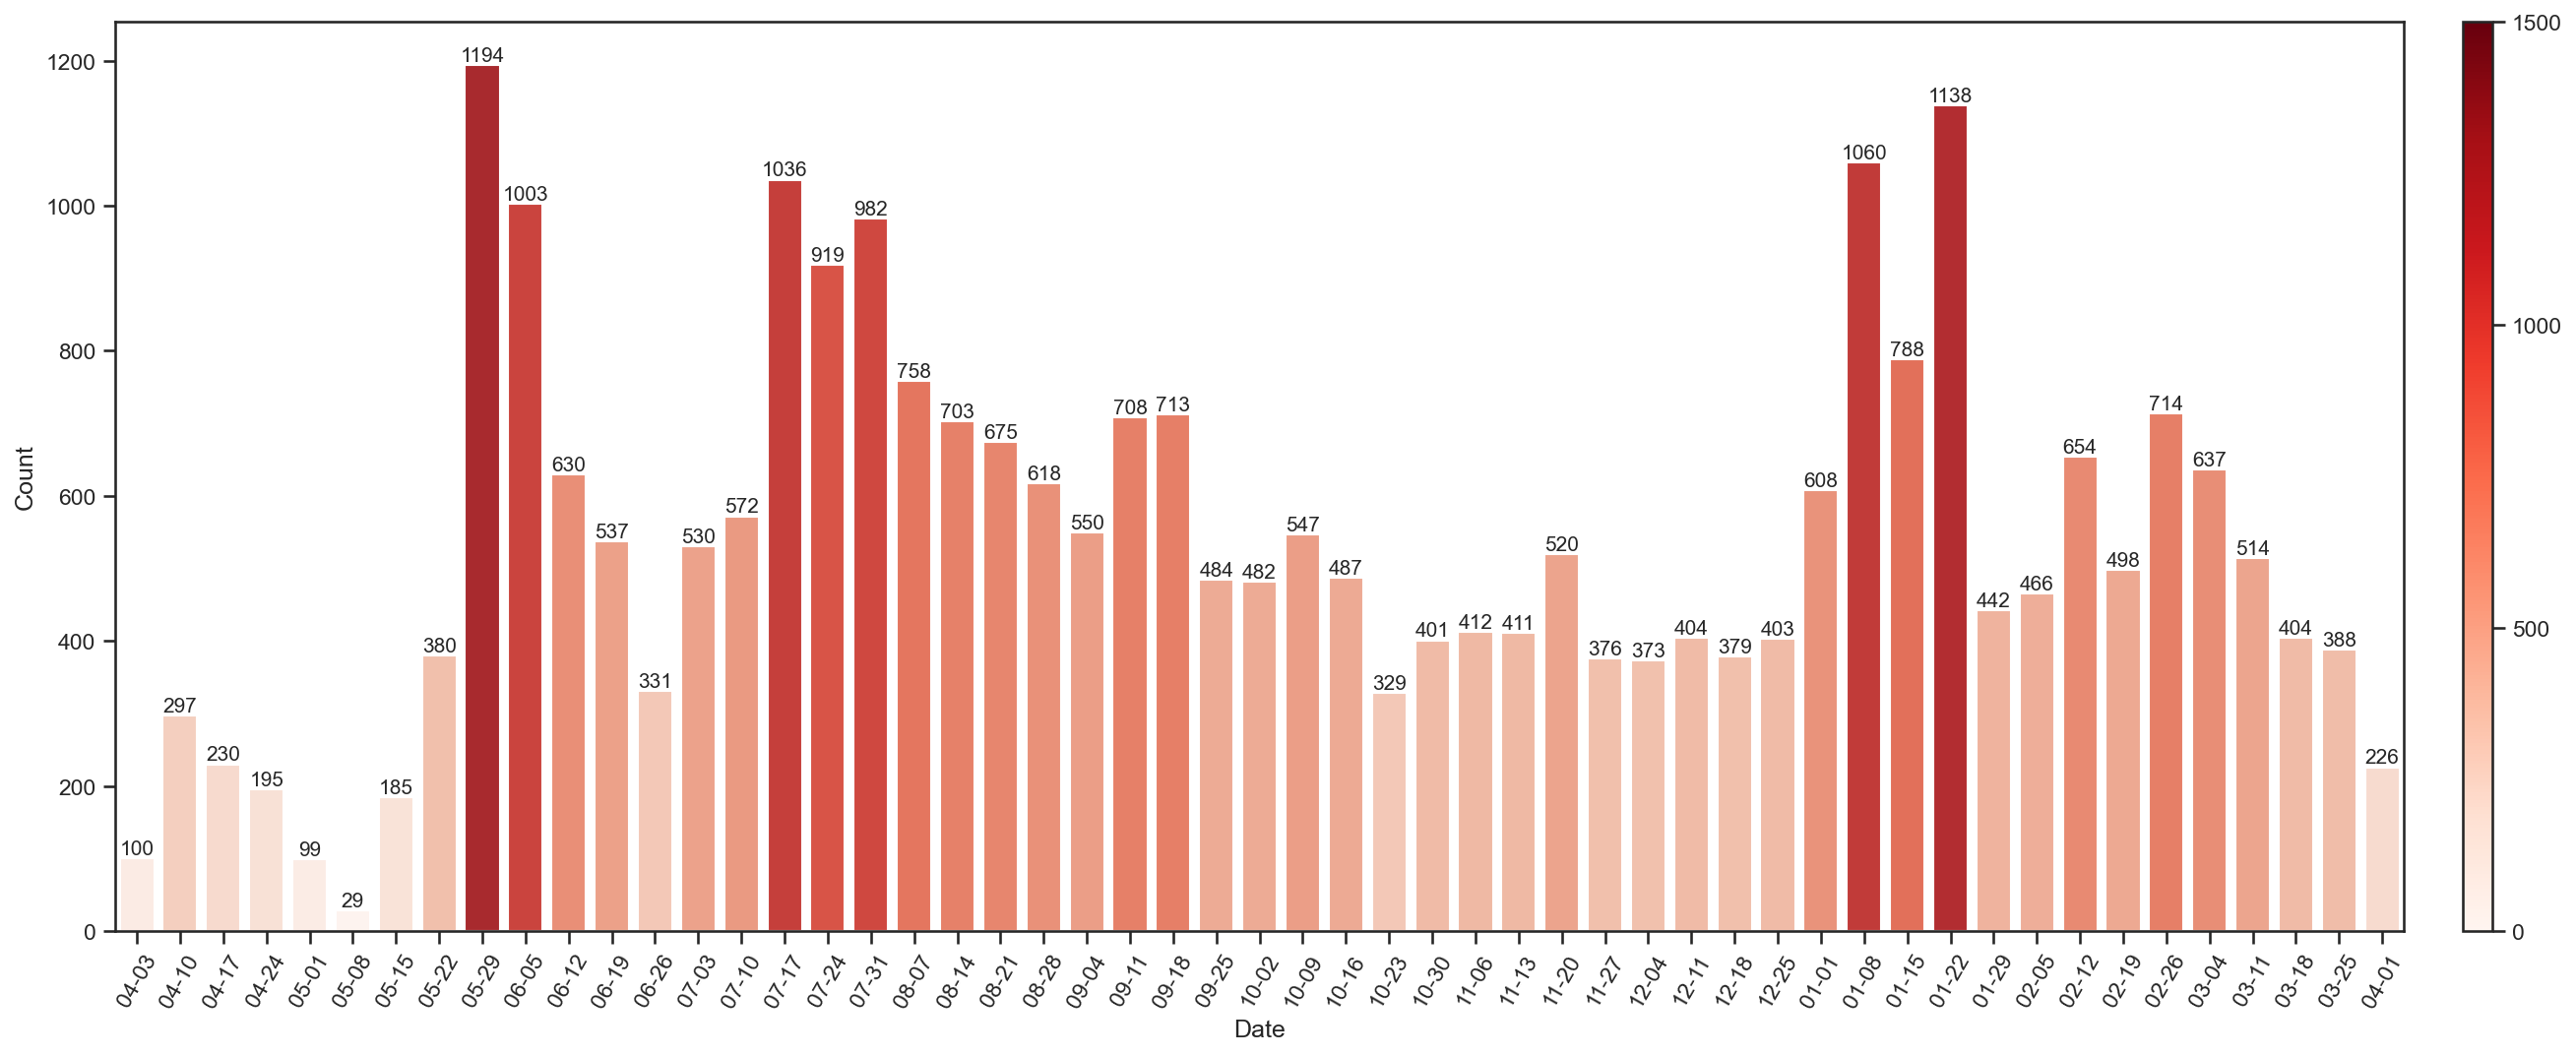

In [14]:
grouper = pd.Grouper(key="StrTime", freq="W-MON")
data = df.groupby(grouper)["Count"].sum().to_frame()
data.index = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")
data.columns = ["Count"]

vM = np.ceil(data["Count"].max() / wTicks) * wTicks
norm = plt.Normalize(0, vM)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)

ax = sns.barplot(x=data.index, y=data["Count"], hue=data["Count"], hue_norm=norm, palette="Reds")
ax.set_xlabel("Date")
plt.xticks(rotation=60)
for bar in ax.containers:
    ax.bar_label(bar, fontsize=10, fmt="%.0f")
ax.get_legend().remove()

axpos = ax.get_position()
caxpos = mtransforms.Bbox.from_extents(axpos.x1 + 0.02, axpos.y0, axpos.x1 + 0.03, axpos.y1)
cax = ax.figure.add_axes(caxpos)

locator = mticker.MultipleLocator(wTicks)
formatter = mticker.StrMethodFormatter("{x:.0f}")
cax.figure.colorbar(sm, cax=cax, ticks=locator, format=formatter)

ax.figure.set_size_inches(20, 8)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊåâÂë®ÂàíÂàÜËÅäÂ§©ÁÉ≠ÊÉÖÂàÜÊûê
ÂàíÂàÜÊØè7Â§©ÂÜÖÁöÑËÅäÂ§©ÁÉ≠ÊÉÖÊåáÊï∞ÔºåËÅäÂ§©ÁÉ≠ÊÉÖÊåáÊï∞‰∏∫ÂèëÈÄÅÁöÑÊ∂àÊÅØÊï∞ÂáèÂéªÊî∂Âà∞ÁöÑÊ∂àÊÅØÊï∞‰∏éÊÄªÊ∂àÊÅØÊï∞ÁöÑÊØîÂÄºÔºö
$$
E = \frac{Q_\mathrm{S} - Q_\mathrm{R}}{Q_\mathrm{S} + Q_\mathrm{R}}
$$

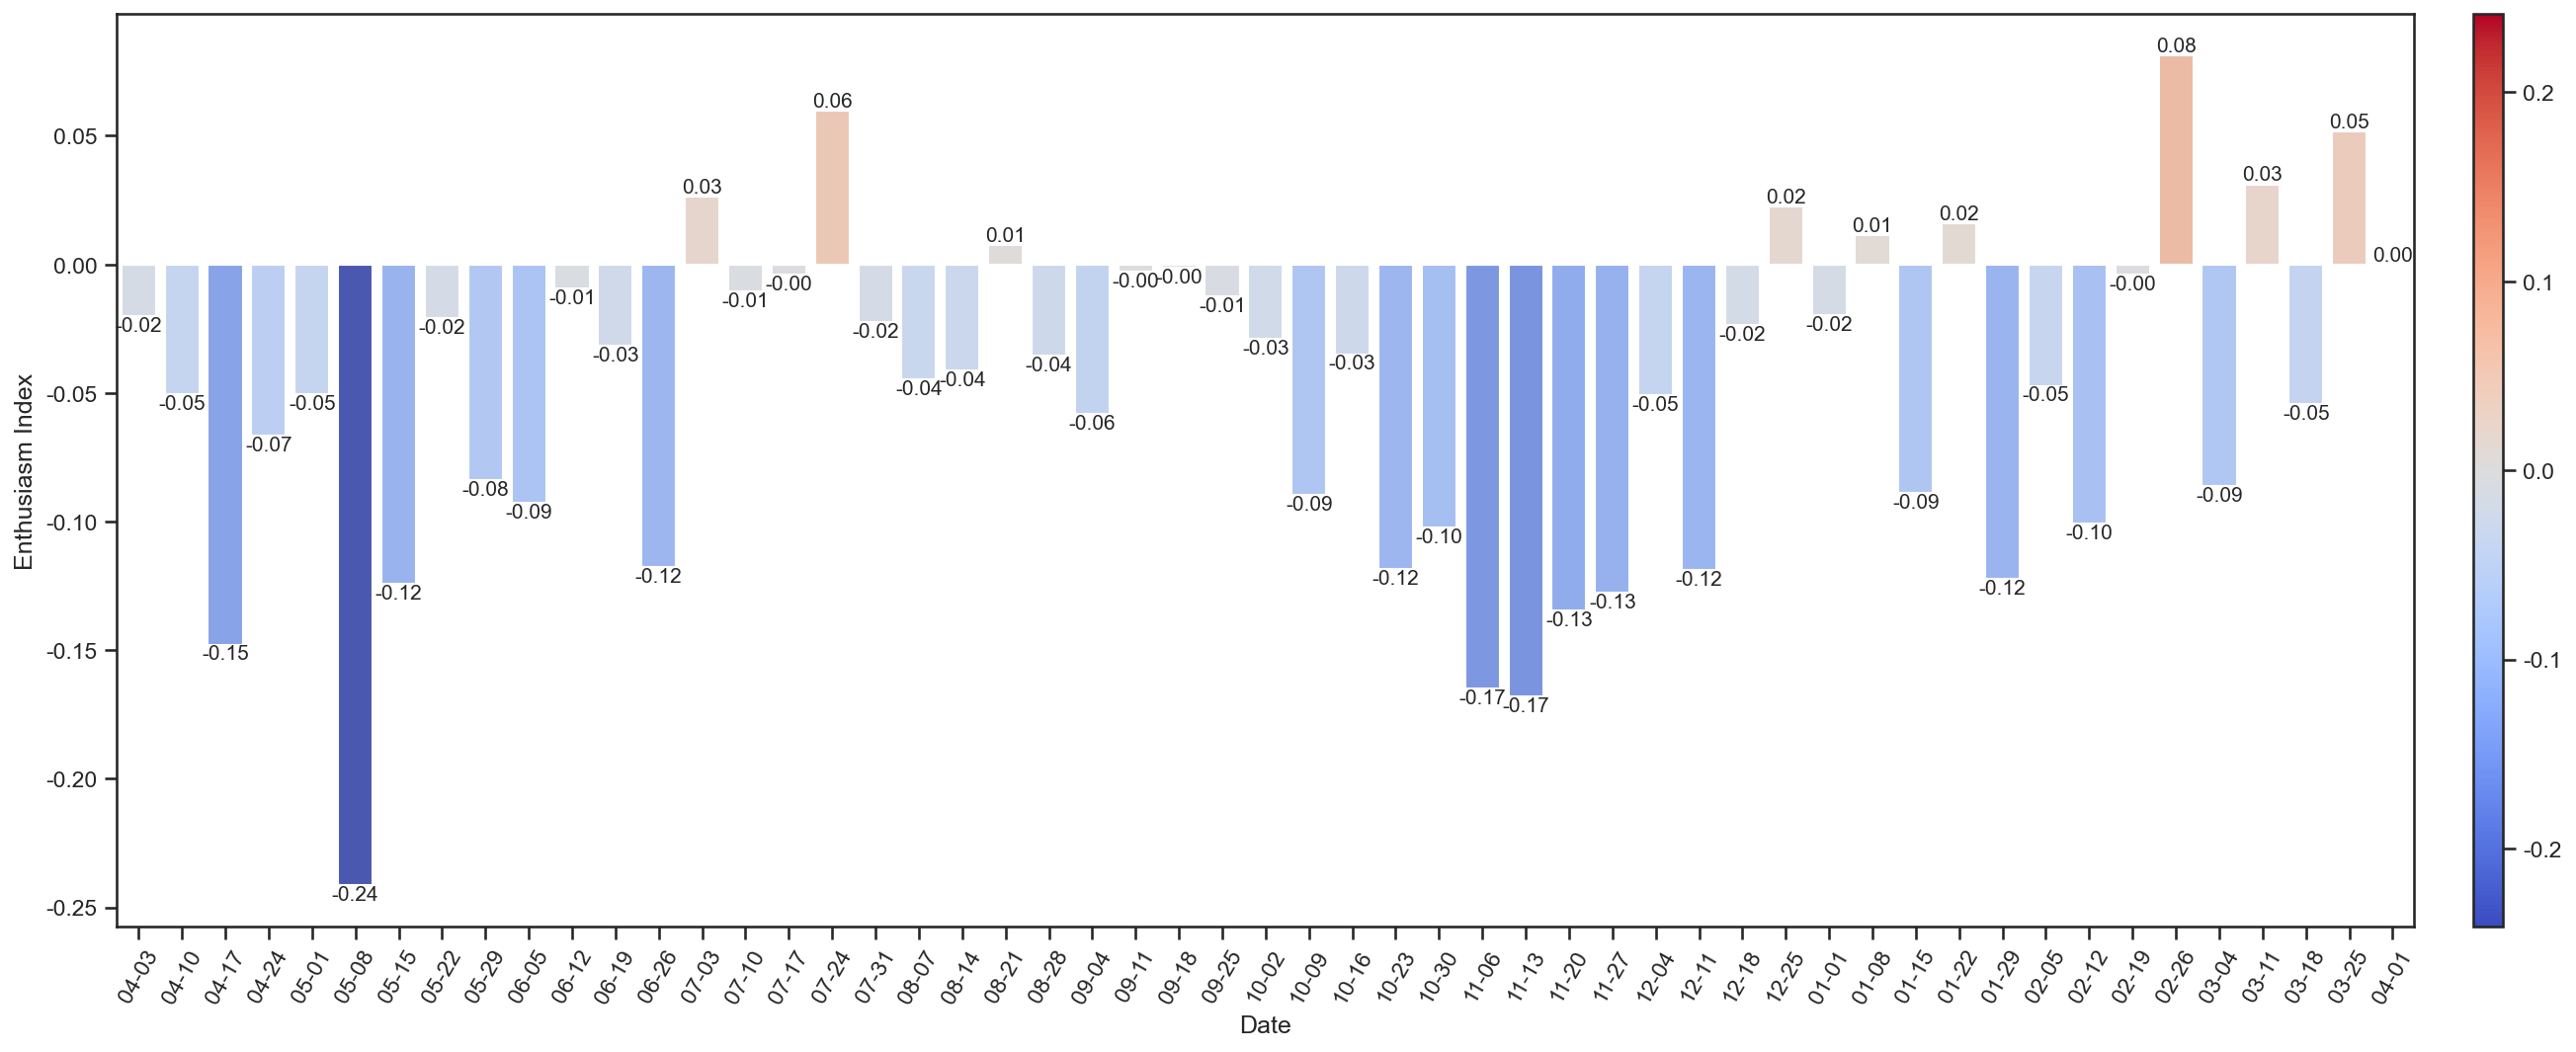

In [15]:
grouper = pd.Grouper(key="StrTime", freq="W-MON")
df_W1 = dfs[0].groupby(grouper)["Count"].sum()
df_W2 = dfs[1].groupby(grouper)["Count"].sum()

data = pd.DataFrame({"E": (df_W1 - df_W2) / (df_W1 + df_W2)})
data.index = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")

vM = data["E"].abs().max()
norm = plt.Normalize(-vM, vM)
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

ax = sns.barplot(x=data.index, y=data["E"], hue=data["E"], hue_norm=norm, palette="coolwarm")
ax.set_xlabel("Date")
plt.xticks(rotation=60)
ax.set_ylabel("Enthusiasm Index")
for bar in ax.containers:
    ax.bar_label(bar, fontsize=10, fmt="%.2f")
ax.get_legend().remove()

axpos = ax.get_position()
caxpos = mtransforms.Bbox.from_extents(axpos.x1 + 0.02, axpos.y0, axpos.x1 + 0.03, axpos.y1)
cax = ax.figure.add_axes(caxpos)

locator = mticker.MultipleLocator(0.1)
formatter = mticker.StrMethodFormatter("{x:.1f}")
cax.figure.colorbar(sm, cax=cax, ticks=locator, format=formatter)

ax.figure.set_size_inches(20, 8)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊåâÊó•ÂàíÂàÜÂπ¥Â∫¶Ê¥ªË∑ÉÂàÜÊûê
‰ª•ÁÉ≠ÂäõÂõæÁöÑÊñπÂºèÂ±ïÁ§∫ÊåâÊó•ÂàíÂàÜÁöÑÂπ¥Â∫¶Ê¥ªË∑ÉÊÉÖÂÜµ

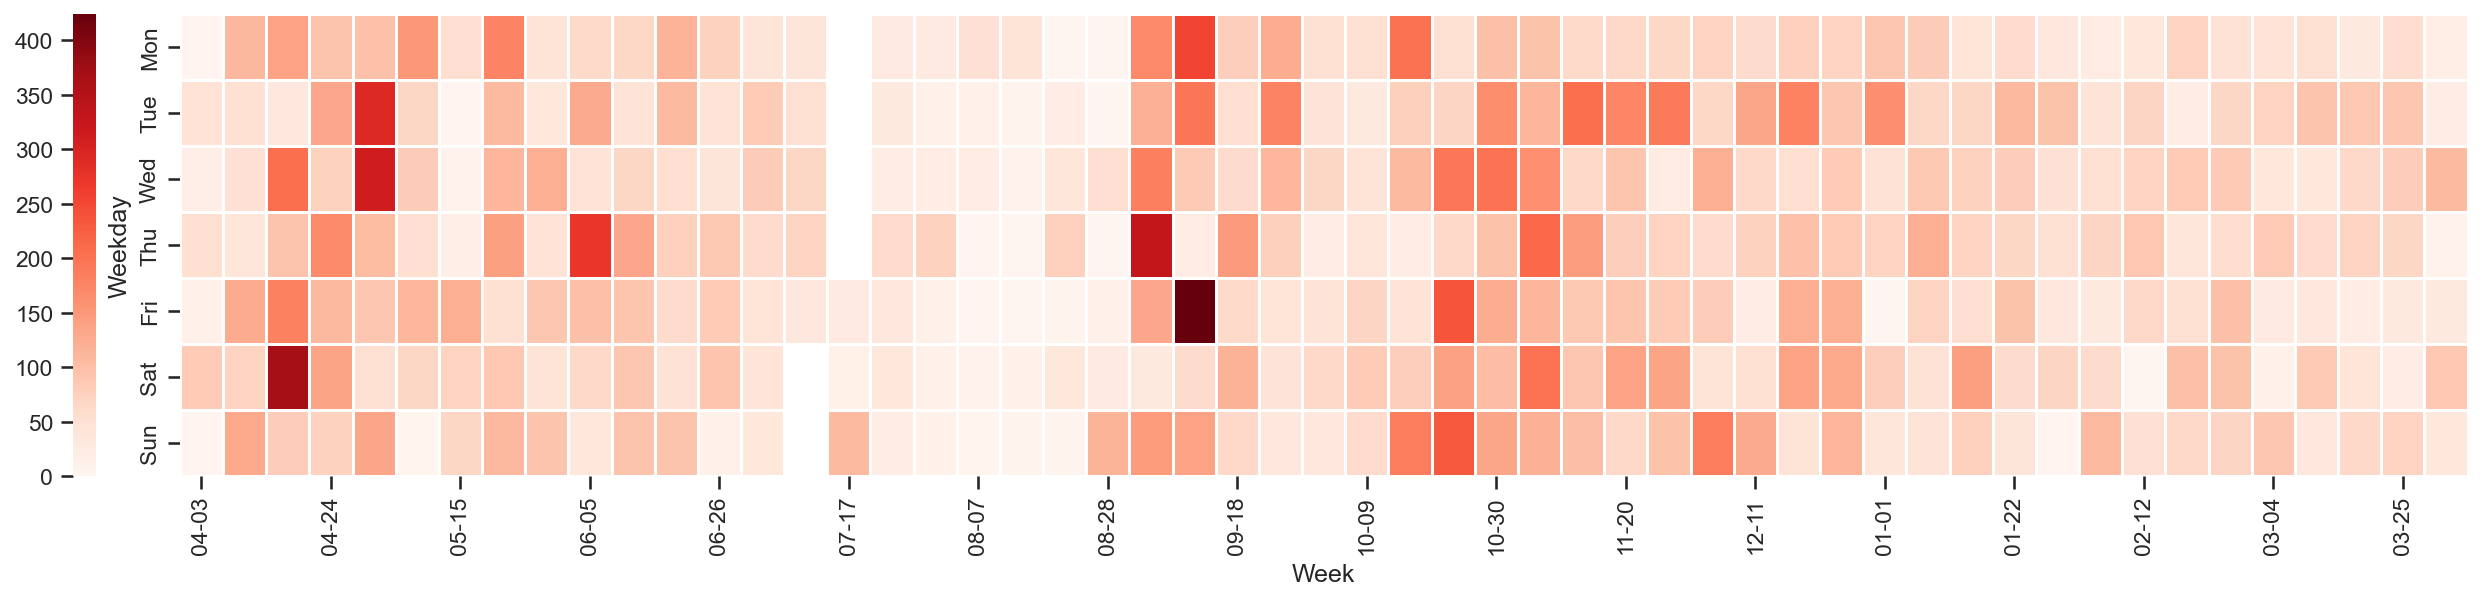

In [16]:
grouper = pd.Grouper(key="StrTime", freq="D")
data = df.groupby(grouper)["Count"].sum()
data = data.to_frame()

data["date"] = data.index
data["week"] = data["date"].dt.isocalendar()["week"]
data["day"] = data["date"].dt.dayofweek
data.index = range(len(data))
for i in range(7):
    if data.loc[i, "week"] > 1:
        data.loc[i, "week"] = 0

data = data.pivot(index="day", columns="week", values="Count")
data.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
data.columns = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")

ax = sns.heatmap(
    data,
    annot=False,
    linewidths=0.5,
    cbar_kws={"orientation": "vertical", "location": "left", "pad": 0.03},
    cmap="Reds",
)
ax.set_xlabel("Week")
ax.set_ylabel("Weekday")
ax.figure.set_size_inches(24, 4)
ax.figure.set_dpi(150)
plt.show()
plt.close()

## ËØçËØ≠ÂàÜÊûê
### ÂàÜËØçËØçÂÖ∏„ÄÅÂÅúÊ≠¢ËØç‰∏éÂéªÈô§ËØçÊÄß

In [17]:
jieba.load_userdict("thuocl.txt")
jieba.load_userdict("userdict.txt")
stopwords = [line.strip() for line in open("stopwords.txt", "r", encoding="utf-8").readlines()] + [" ", "\n", "\r\n"]
wordclass = ["v", "u", "vd", "r", "p", "w"]

Building prefix dict from the default dictionary ...
[2024-04-08 12:16:18,566] [   DEBUG] __init__.py:113 - Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\VIVIAN~1\AppData\Local\Temp\jieba.cache
[2024-04-08 12:16:18,576] [   DEBUG] __init__.py:132 - Loading model from cache C:\Users\VIVIAN~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.764 seconds.
[2024-04-08 12:16:19,331] [   DEBUG] __init__.py:164 - Loading model cost 0.764 seconds.
Prefix dict has been built successfully.
[2024-04-08 12:16:19,338] [   DEBUG] __init__.py:166 - Prefix dict has been built successfully.


### ÂàÜËØçÂáΩÊï∞

In [18]:
def wordSplit(texts, wordclass):
    words = []
    pbar = tqdm(total=len(texts))
    for i in range(len(texts)):
        res = pseg.lcut(texts[i])
        for pair in res:
            if pair.word in stopwords:
                continue
            if pair.flag in wordclass:
                continue
            words.append(pair.word)
        if i % 1000 == 0:
            pbar.update(1000)
    pbar.close()
    return words

In [19]:
words = [wordSplit(texts[i], wordclass) for i in range(2)]

12000it [00:05, 2303.94it/s]                                                                                           
10000it [00:05, 1896.25it/s]                                                                                           


### ËØç‰∫ëÁªòÂà∂
* `mask`: ËØç‰∫ëÁöÑËíôÁâàÔºåÂΩ±ÂìçËØç‰∫ëÁöÑÂΩ¢Áä∂
* `cmap`: Ëâ≤Èò∂

In [20]:
mask = np.array(Image.open("mask.png"))
masks = [np.array(Image.open("mask_L.jpg")), np.array(Image.open("mask_F.jpg"))]
cmap = ListedColormap(
    [
        "#fac1cf",
        "#a9d7ba",
        "#58b1db",
        "#f296ab",
        "#5dab81",
        "#3d9ec4",
        "#e16a8d",
        "#237b50",
        "#1e8299",
        "#8d3549",
        "#35563b",
        "#2d5d73",
    ]
)

In [137]:
def wordCloud(text, font, mask, cmap):
    wc = WordCloud(
        background_color="white",
        scale=10,
        font_path=font,
        mask=mask,
        colormap=cmap,
        collocations=False,
    ).generate(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

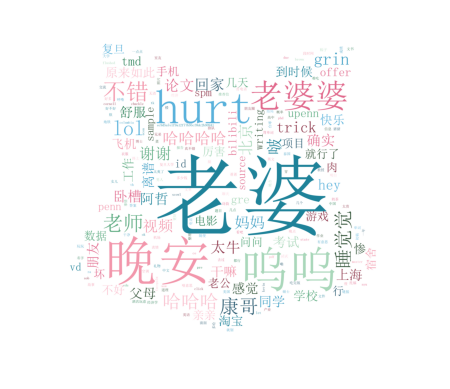

In [138]:
wordCloud(" ".join(words[0]), font, masks[1], cmap)

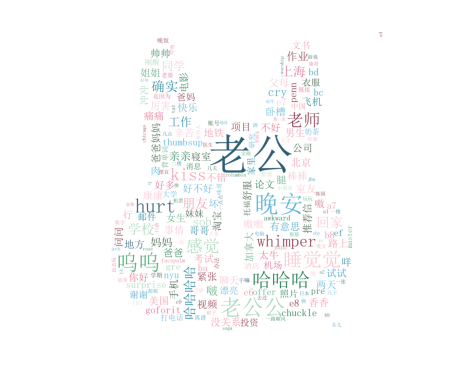

In [139]:
wordCloud(" ".join(words[1]), font, masks[0], cmap)

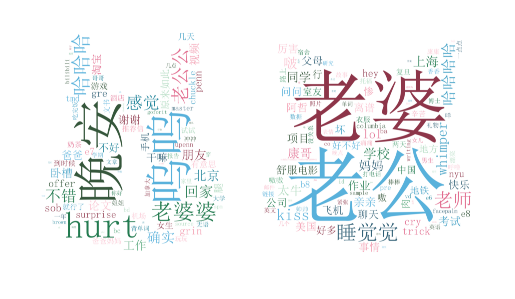

In [140]:
wordCloud(" ".join(words[0] + words[1]), font, mask, cmap)

### È´òÈ¢ëËØçÊéíË°å
ÂàóÂá∫Â∏∏Áî®ÁöÑ N ‰∏™ËØçÔºåÂπ∂‰∏îÂ±ïÁ§∫ÂèåÊñπÁöÑË¥°ÁåÆ
* `wN`: ËØçÁöÑÊï∞ÁõÆÔºåÈªòËÆ§‰∏∫50

In [82]:
wN = 50

In [83]:
data = pd.DataFrame(
    {
        "words": words[0] + words[1],
        "L": [1] * len(words[0]) + [0] * len(words[1]),
        "F": [0] * len(words[0]) + [1] * len(words[1]),
        "S": [1] * len(words[0]) + [1] * len(words[1]),
    }
)

grouper = pd.Grouper(key="words")
data = data.groupby(grouper).sum()
data = data.sort_values(by="S", ascending=False)
data = data.iloc[:wN]

In [84]:
# Â∞ÜÈÉ®ÂàÜÊó†Ê≥ïËØÜÂà´ÁöÑ emoji ËΩ¨Âåñ‰∏∫ÊñáÂ≠ó
tmp = data.index.to_list()
for i in range(wN):
    if tmp[i] == "üòò":
        tmp[i] = "[‰∫≤‰∫≤]"
    elif tmp[i] == "üòÇ":
        tmp[i] = "[Á¨ëÂì≠]"
    elif tmp[i] == "ü§¶":
        tmp[i] = "[ÊçÇËÑ∏]"
    elif tmp[i] == "üòÅ":
        tmp[i] = "[Âë≤Áâô]"
data.index = tmp

D:\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


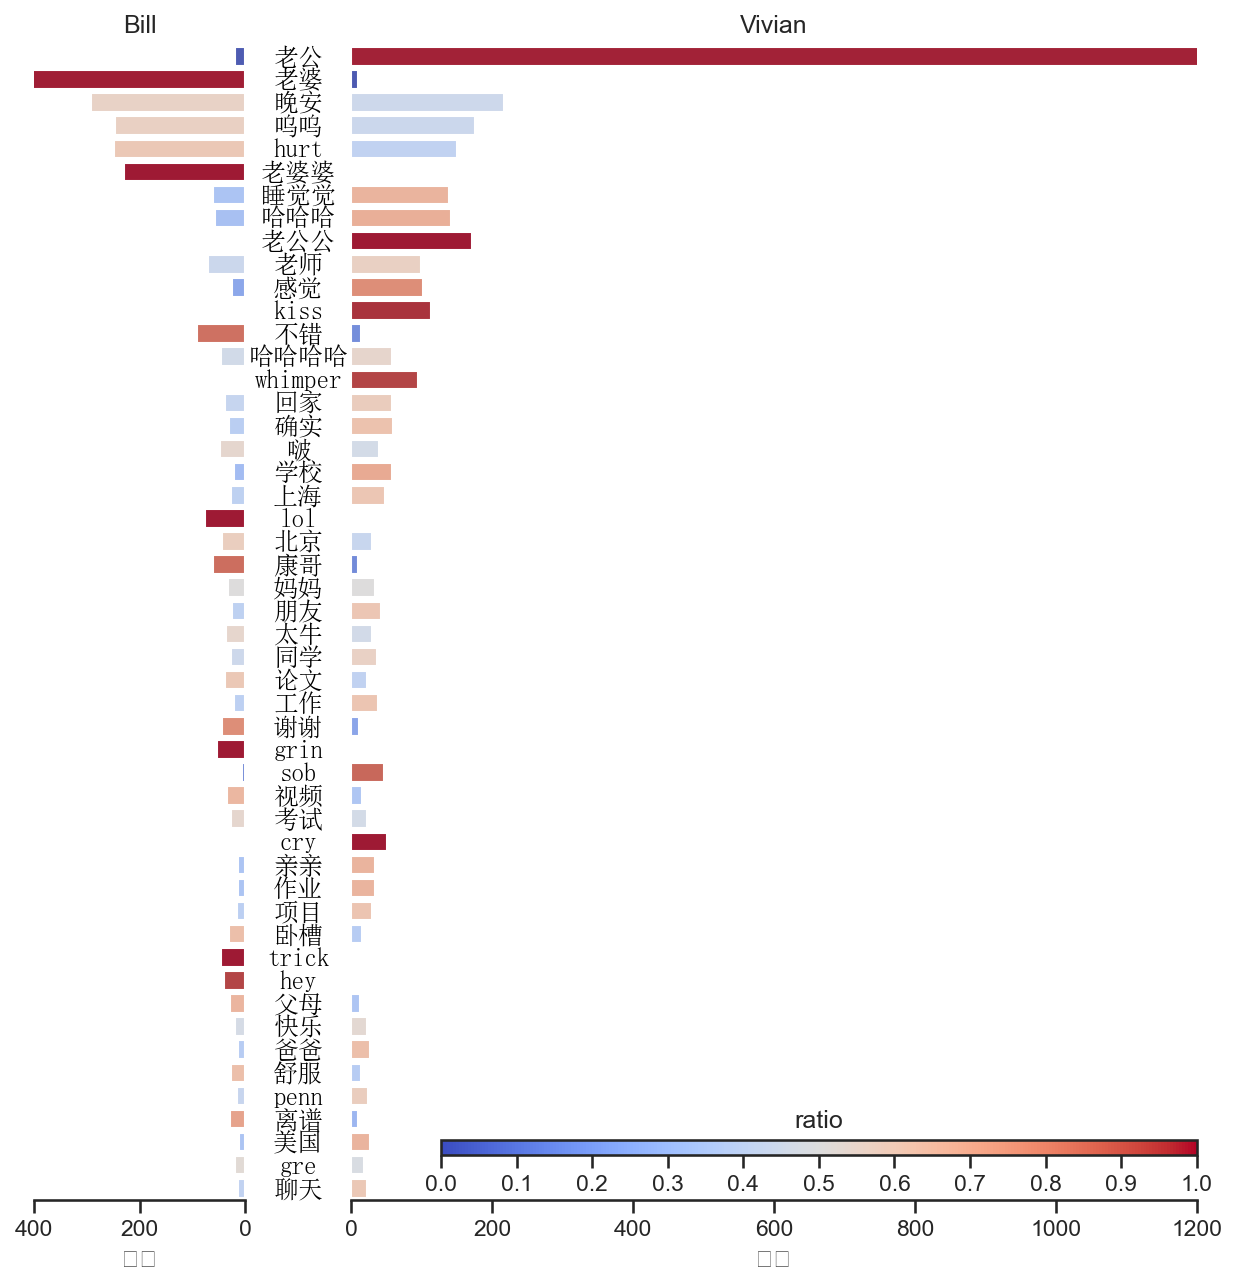

In [85]:
ratio = data["L"] / data["S"]
norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

fig = plt.figure(figsize=(10, 10), dpi=300)
grid = plt.GridSpec(1, 4, wspace=0.5)

ax0 = fig.add_subplot(grid[0, 0])
sns.barplot(x=-data["L"], y=data.index, ax=ax0, hue=ratio, hue_norm=norm, palette="coolwarm")
ax1 = fig.add_subplot(grid[0, 1:])
sns.barplot(x=data["F"], y=data.index, ax=ax1, hue=(1 - ratio), hue_norm=norm, palette="coolwarm")

ax0.set_xlabel("ËØçÈ¢ë")
ax0.set_ylabel("")
ax0.set_xticks(range(-400, 1, 200))
ax0.set_xticklabels([400, 200, 0])
ax0.set_xlim(-400, 0)
ax0.set_yticks([])
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.set_title("Bill")
ax0.get_legend().remove()

ax1.set_xlabel("ËØçÈ¢ë")
ax1.set_ylabel("")
ax1.set_xticks(range(0, 1201, 200))
ax1.set_xticklabels([0, 200, 400, 600, 800, 1000, 1200])
ax1.set_xlim(0, 1200)
ax1.set_yticks([])
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_title("Vivian")
ax1.get_legend().remove()

axpos = ax1.get_position()
caxpos = mtransforms.Bbox.from_extents(axpos.x0 + 0.06, axpos.y0 + 0.03, axpos.x1, axpos.y0 + 0.04)
cax = ax1.figure.add_axes(caxpos)

locator = mticker.MultipleLocator(0.1)
formatter = mticker.StrMethodFormatter("{x:.1f}")
cax.figure.colorbar(sm, cax=cax, orientation="horizontal", ticks=locator, format=formatter)
cax.set_title("ratio")

x0 = ax0.get_position().x1
x1 = ax1.get_position().x0
xm = (x0 + x1) / 2
y0 = ax0.get_position().y0
y1 = ax0.get_position().y1

for i in range(wN):
    fig.text(
        xm, y0 + (y1 - y0) * (wN - i - 0.5) / wN, data.index[i],
        color="black", ha="center", va="center", fontproperties=fp
    )

fig.set_dpi(150)
plt.show()
plt.close()


## ÊÉÖÊÑüÂàÜÊûê
‰ΩøÁî® `paddlenlp` ËøõË°åÊÉÖÊÑüÂàÜÊûêÔºåÂæóÂà∞ÁöÑÂàÜÊï∞Âú® [-1, 1] ‰πãÈó¥ÔºåË∂äÂ∞èË∂äÊ∂àÊûÅÔºåË∂äÂ§ßË∂äÁßØÊûÅ

In [29]:
dfE = df.query("Type == 1")[["IsSender", "StrContent", "StrTime", "hour"]]
dfE.index = range(len(dfE))

In [30]:
senta = Taskflow("sentiment_analysis")

In [31]:
scores = pd.DataFrame(senta([textFilter(i) for i in dfE["StrContent"].to_list()]))
scores.loc[scores["label"] == "negative", "score"] = 1 - scores.loc[scores["label"] == "negative", "score"]

In [32]:
dfE["score"] = scores["score"]
dfE["score"] = 2 * dfE["score"] - 1
dfE["Person"] = dfE.apply(lambda x: labels[x["IsSender"]], axis=1)

dfEs = [dfE.query("IsSender == 0"), dfE.query("IsSender == 1")]

### Âπ¥Â∫¶ÊÄª‰ΩìÊÉÖÊÑüÂàÜÂ∏É

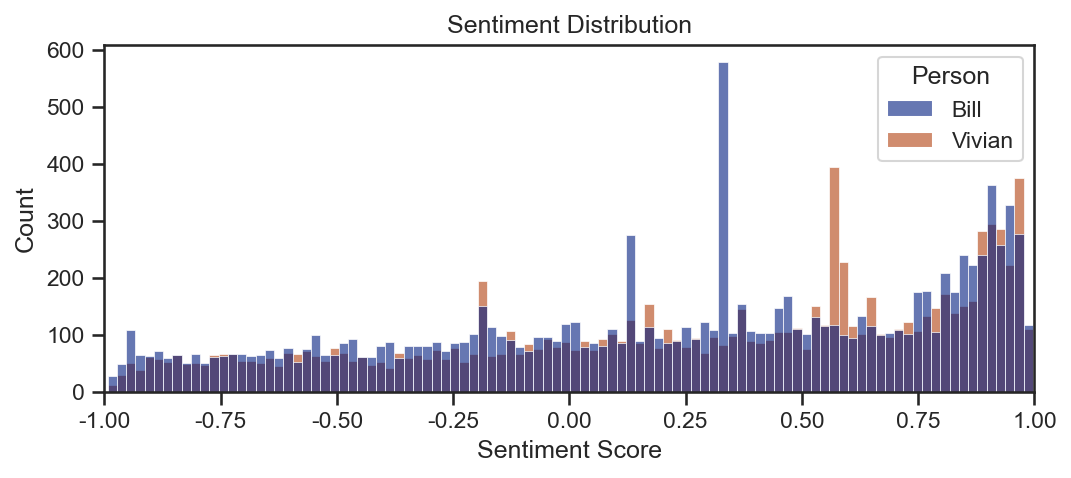

In [33]:
ax = sns.histplot(data=dfE, x="score", hue="Person", palette="dark", alpha=0.6, bins=100)

ax.set_xlabel("Sentiment Score")
ax.set_ylabel("Count")
ax.set_title("Sentiment Distribution")
ax.set_xlim(-1, 1)

ax.figure.set_size_inches(8, 3)
ax.figure.set_dpi(150)
plt.show()

### ÊåâÂë®ÁªüËÆ°Âπ≥ÂùáÊÉÖÊÑüÊåáÊï∞

In [34]:
def weekAvgSenScore(df):
    grouper = pd.Grouper(key="StrTime", freq="W-MON")
    data = df.groupby(grouper)["score"].mean().to_frame()
    data.index = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")
    data.columns = ["score"]

    vM = data["score"].abs().max()
    norm = plt.Normalize(-vM, vM)
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

    ax = sns.barplot(x=data.index, y=data["score"], hue=data["score"], hue_norm=norm, palette="coolwarm")
    ax.set_xlabel("Date")
    plt.xticks(rotation=60)
    for bar in ax.containers:
        ax.bar_label(bar, fontsize=10, fmt="%.2f")
    ax.get_legend().remove()

    axpos = ax.get_position()
    caxpos = mtransforms.Bbox.from_extents(axpos.x1 + 0.02, axpos.y0, axpos.x1 + 0.03, axpos.y1)
    cax = ax.figure.add_axes(caxpos)

    locator = mticker.MultipleLocator(0.05)
    formatter = mticker.StrMethodFormatter("{x:.2f}")
    cax.figure.colorbar(sm, cax=cax, ticks=locator, format=formatter)

    ax.figure.set_size_inches(20, 8)
    ax.figure.set_dpi(150)
    plt.show()
    plt.close()

    return data["score"]

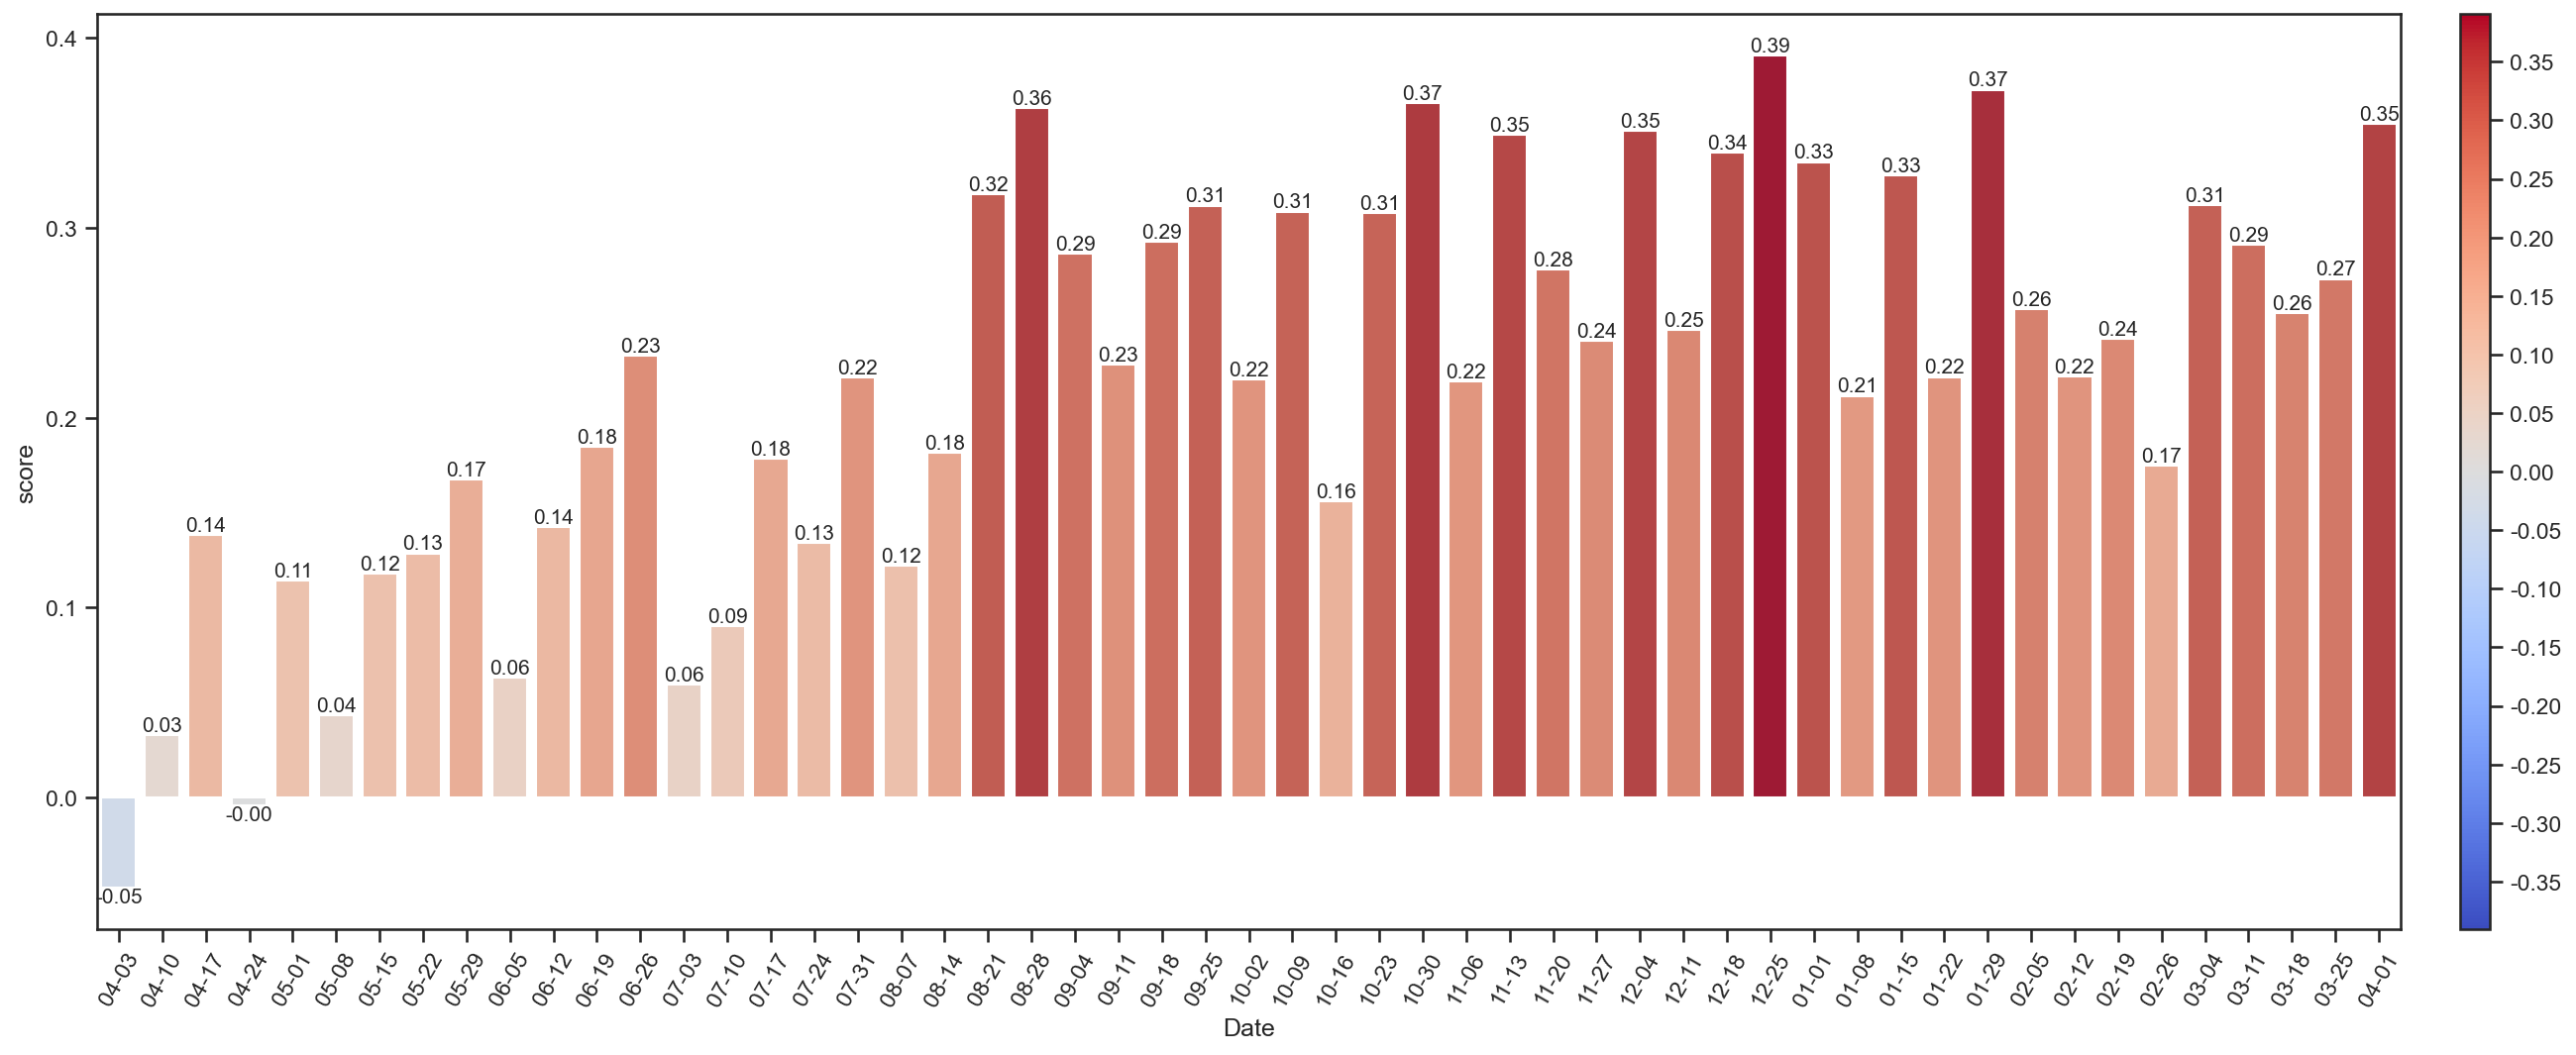

In [35]:
avgSenScore0 = weekAvgSenScore(dfEs[0])

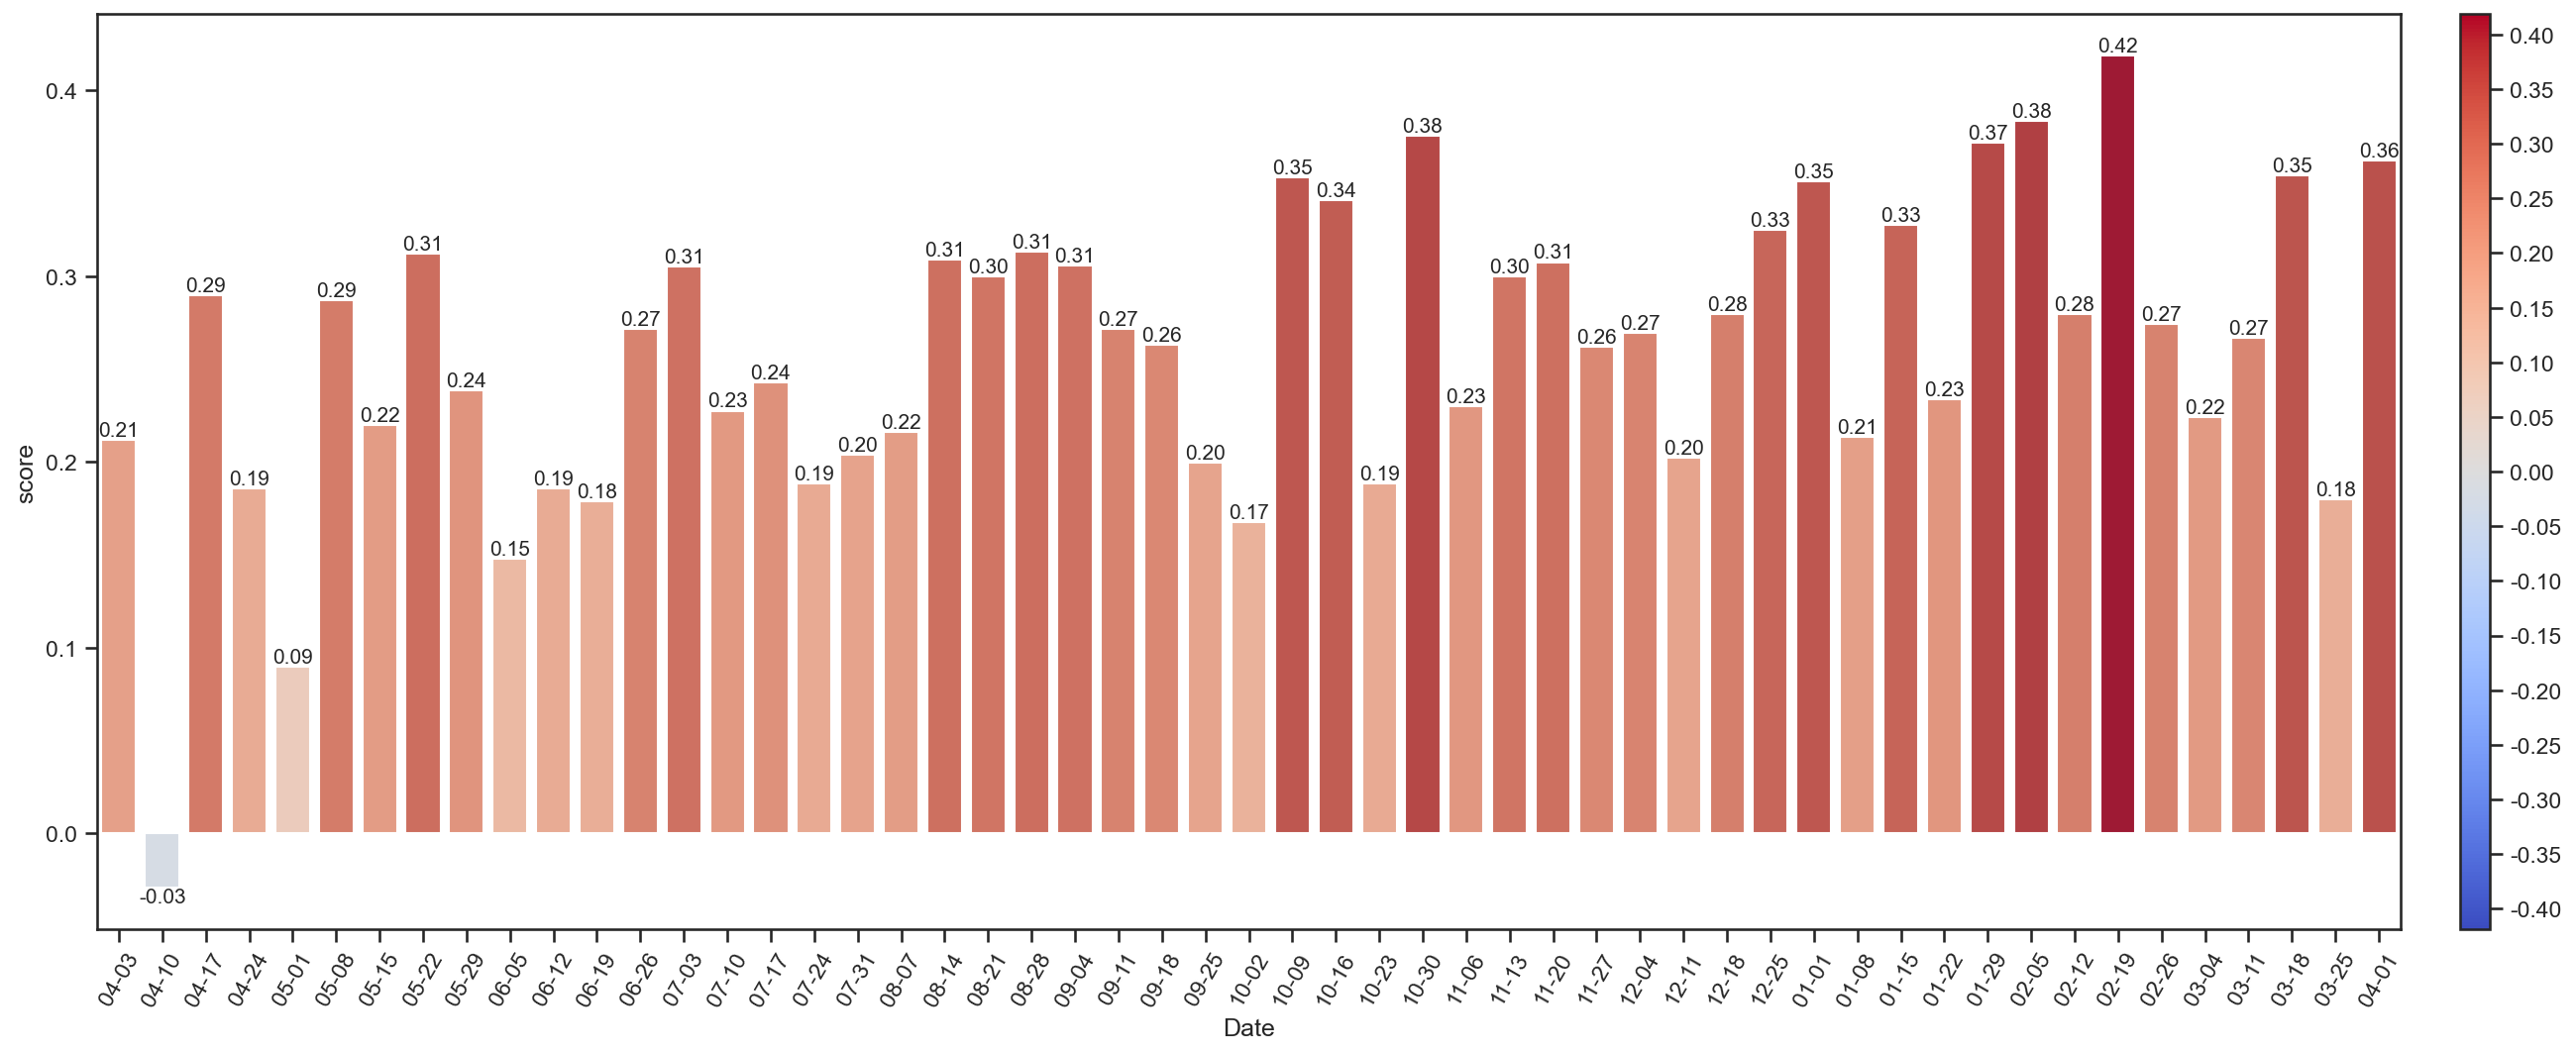

In [36]:
avgSenScore1 = weekAvgSenScore(dfEs[1])

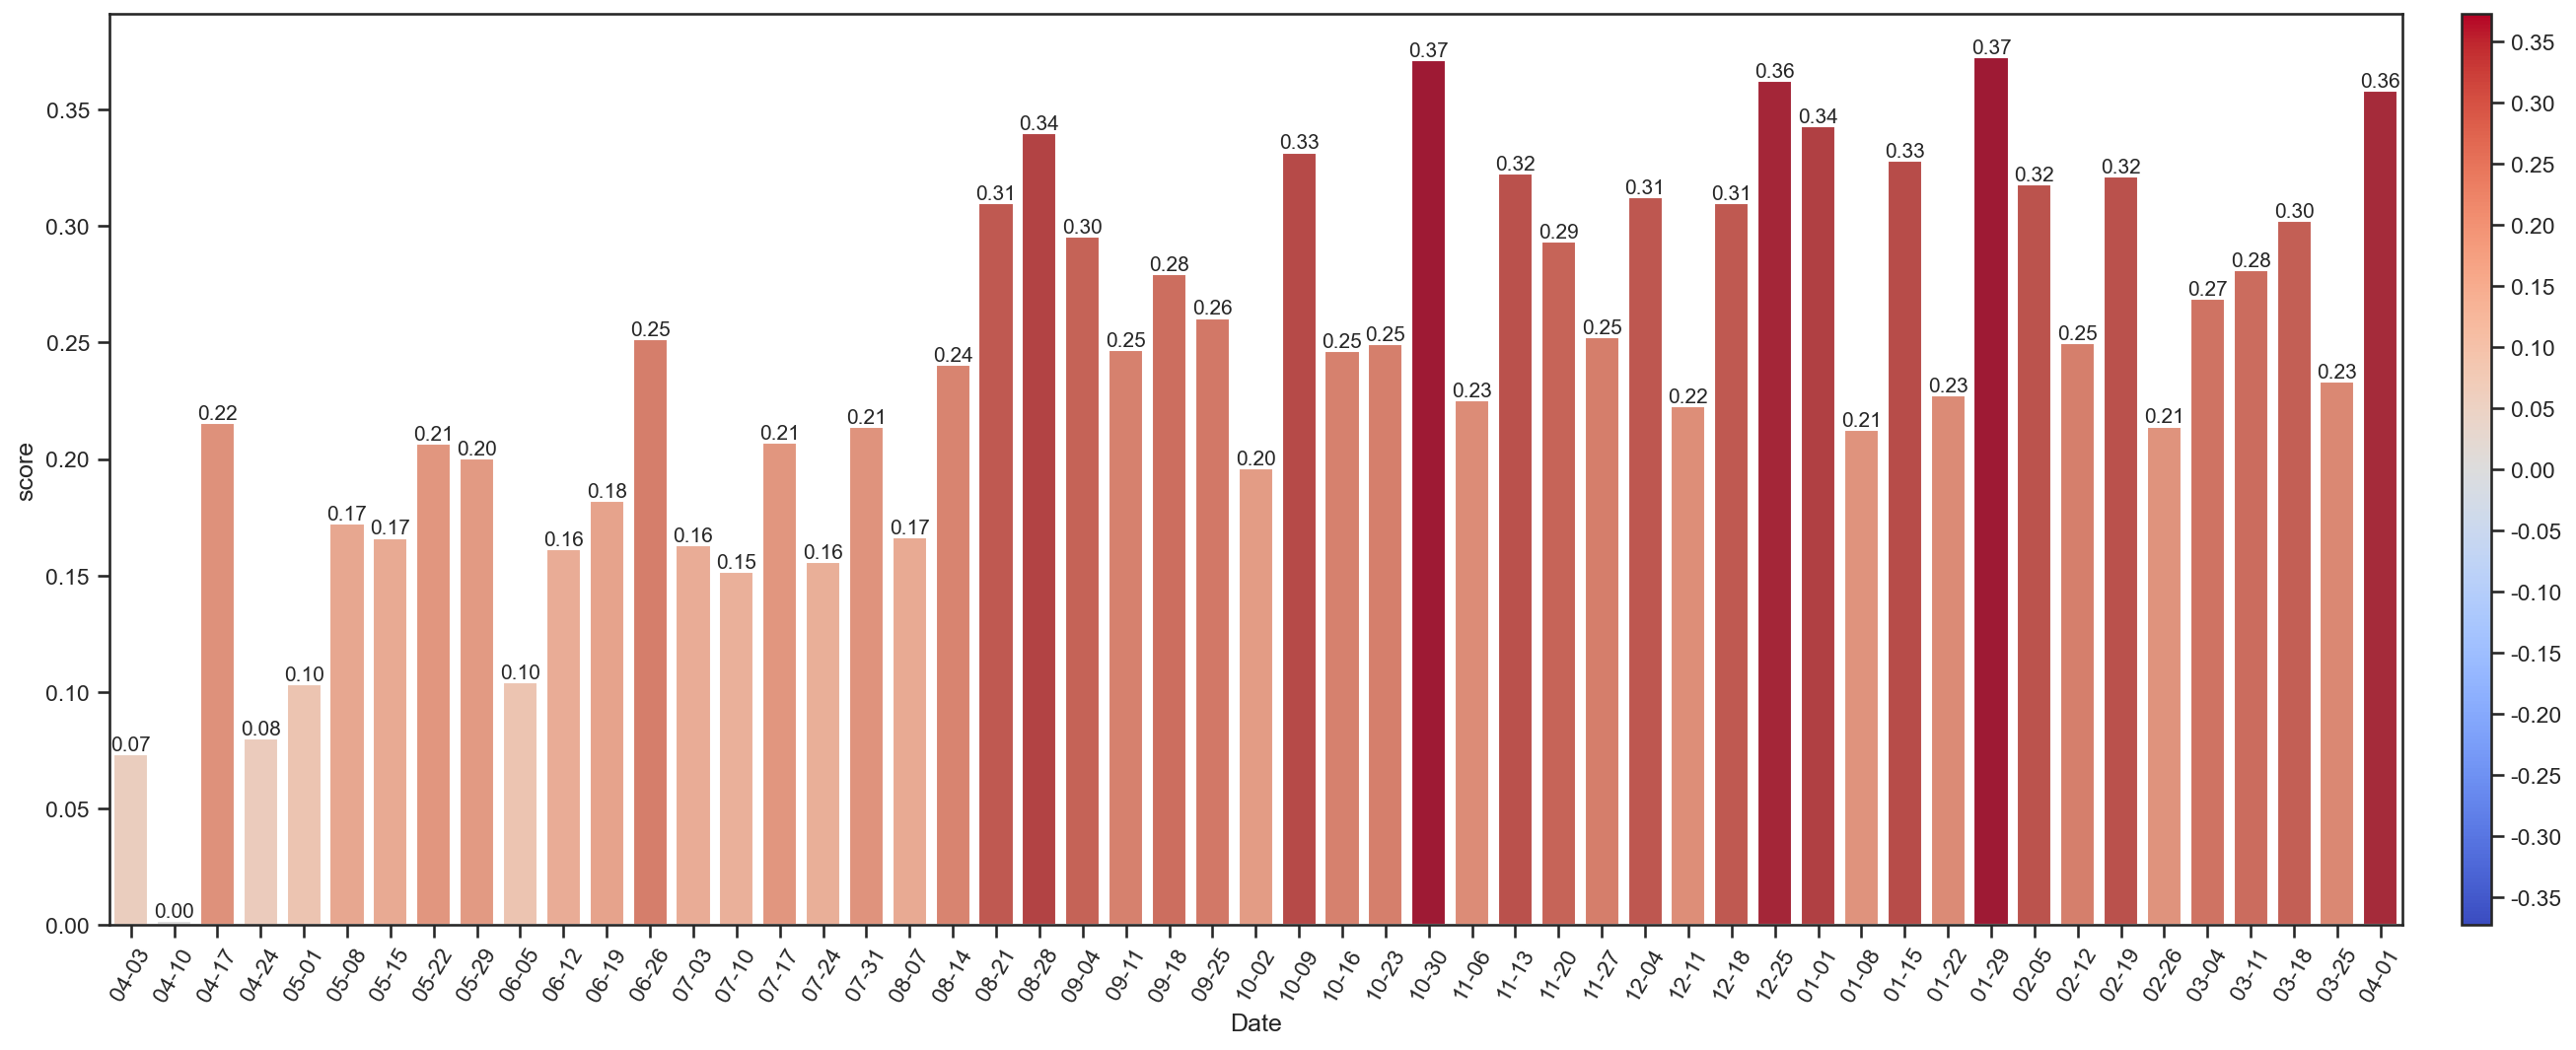

In [37]:
_ = weekAvgSenScore(dfE)

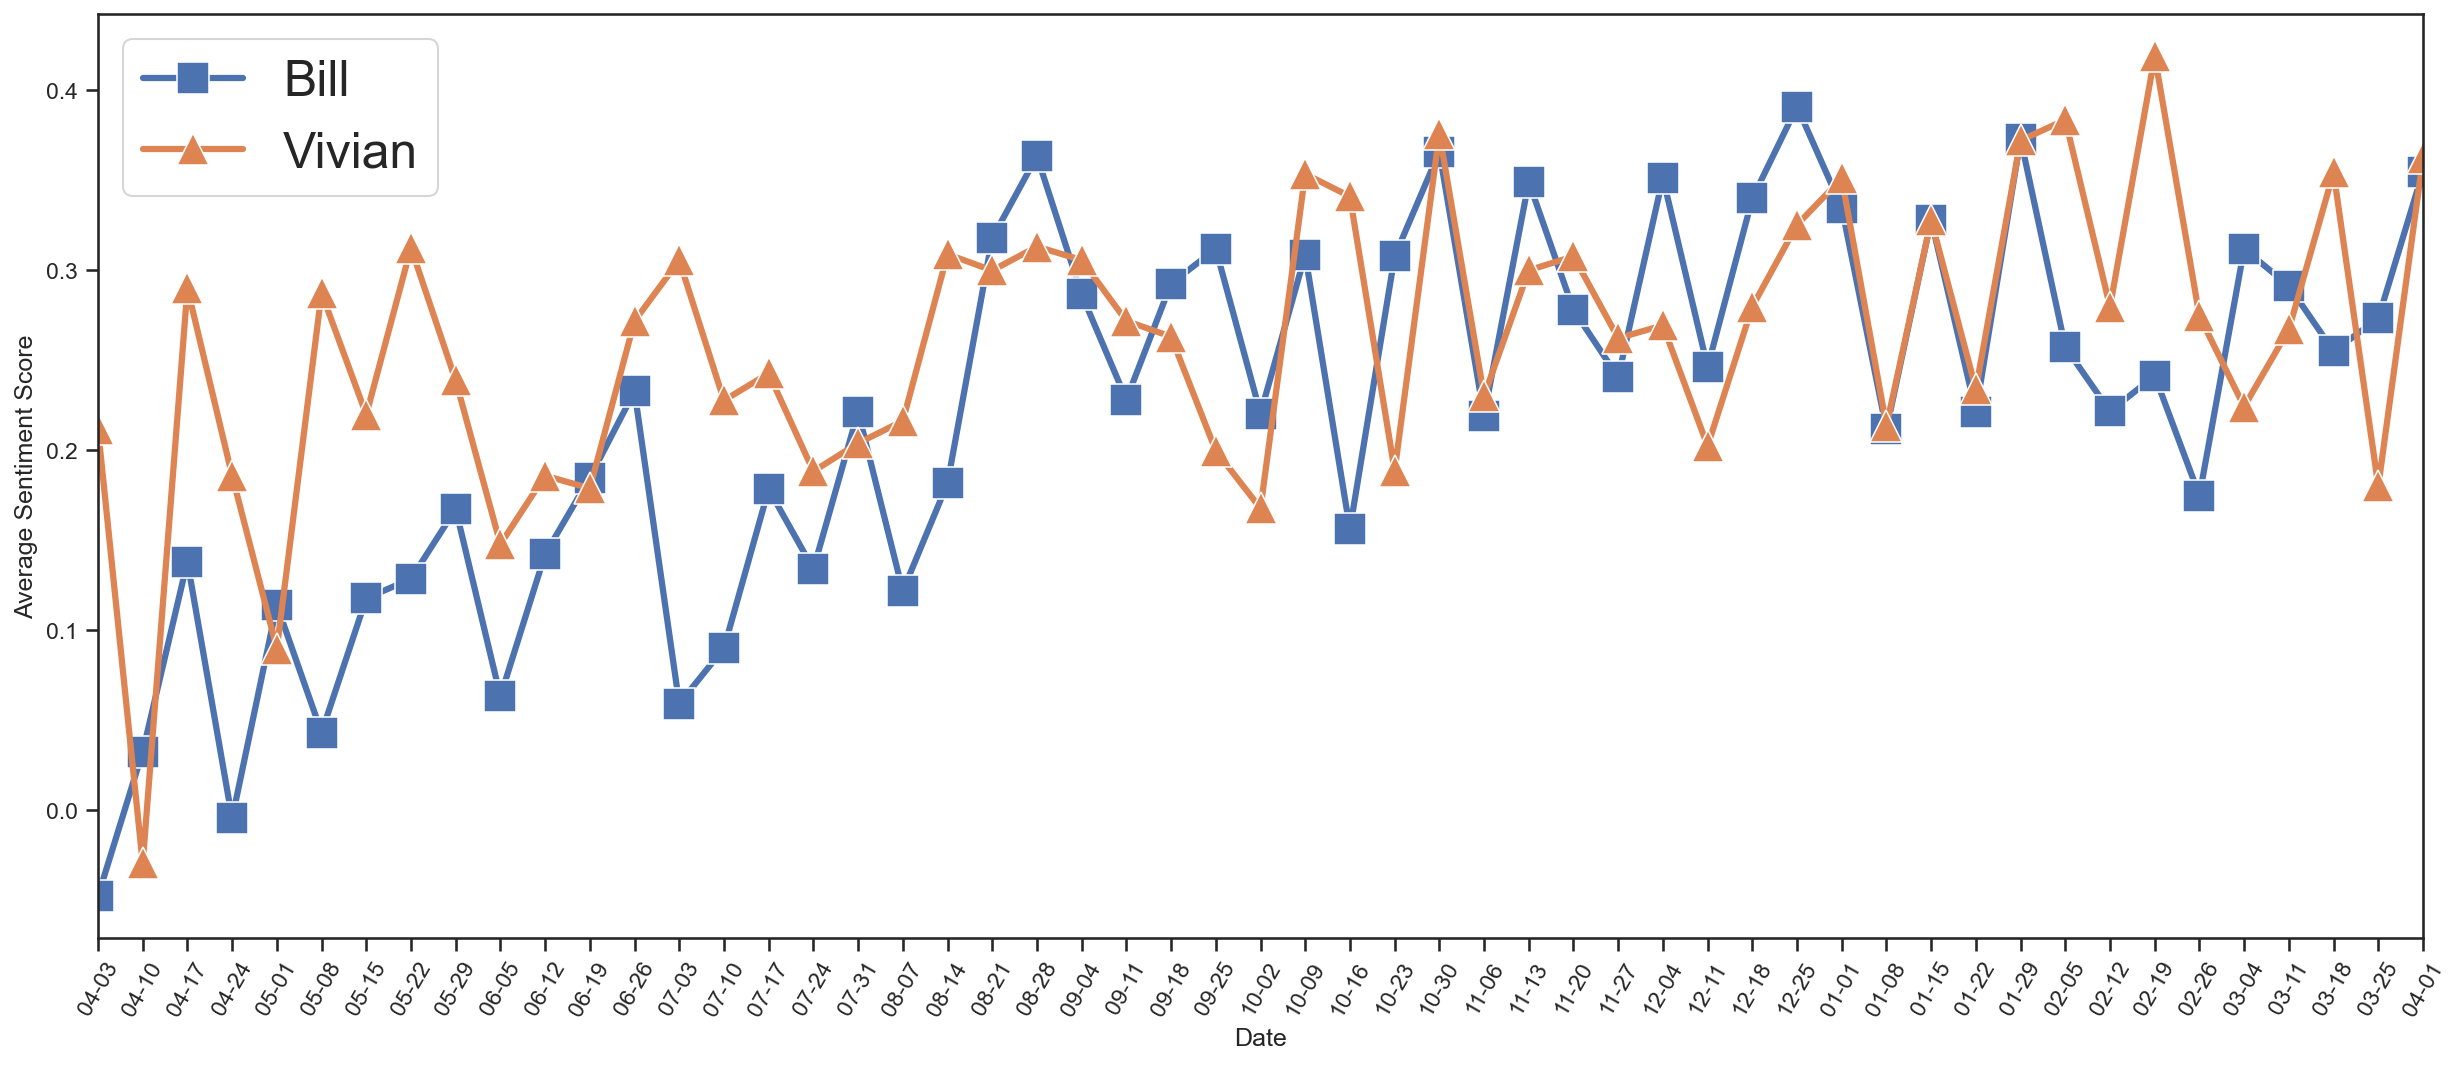

In [38]:
ax = sns.lineplot(data=avgSenScore0, linewidth=3, marker="s", markersize=15, label=labels[0])
ax = sns.lineplot(data=avgSenScore1, linewidth=3, marker="^", markersize=15, ax=ax, label=labels[1])

ax.set_xlabel("Date")
plt.xticks(rotation=60)
ax.set_ylabel("Average Sentiment Score")
ax.set_xlim(0, 52)
ax.legend(prop={"size": 24})

ax.figure.set_size_inches(20, 8)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊåâÂë®ÁªüËÆ°Á¥ØËÆ°ÊÉÖÊÑüÊåáÊï∞

In [39]:
def weekTotSenScore(df):
    grouper = pd.Grouper(key="StrTime", freq="W-MON")
    data = df.groupby(grouper)["score"].sum().to_frame()
    data.index = pd.date_range(start=wStart, end=wEnd, freq="W-MON").strftime("%m-%d")
    data.columns = ["score"]

    vM = data["score"].abs().max()
    norm = plt.Normalize(-vM, vM)
    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

    ax = sns.barplot(x=data.index, y=data["score"], hue=data["score"], hue_norm=norm, palette="coolwarm")
    ax.set_xlabel("Date")
    plt.xticks(rotation=60)
    for bar in ax.containers:
        ax.bar_label(bar, fontsize=10, fmt="%.2f")
    ax.get_legend().remove()

    axpos = ax.get_position()
    caxpos = mtransforms.Bbox.from_extents(axpos.x1 + 0.02, axpos.y0, axpos.x1 + 0.03, axpos.y1)
    cax = ax.figure.add_axes(caxpos)

    locator = mticker.MultipleLocator(20)
    formatter = mticker.StrMethodFormatter("{x:.2f}")
    cax.figure.colorbar(sm, cax=cax, ticks=locator, format=formatter)

    ax.figure.set_size_inches(20, 8)
    ax.figure.set_dpi(150)
    plt.show()
    plt.close()

    return data["score"]

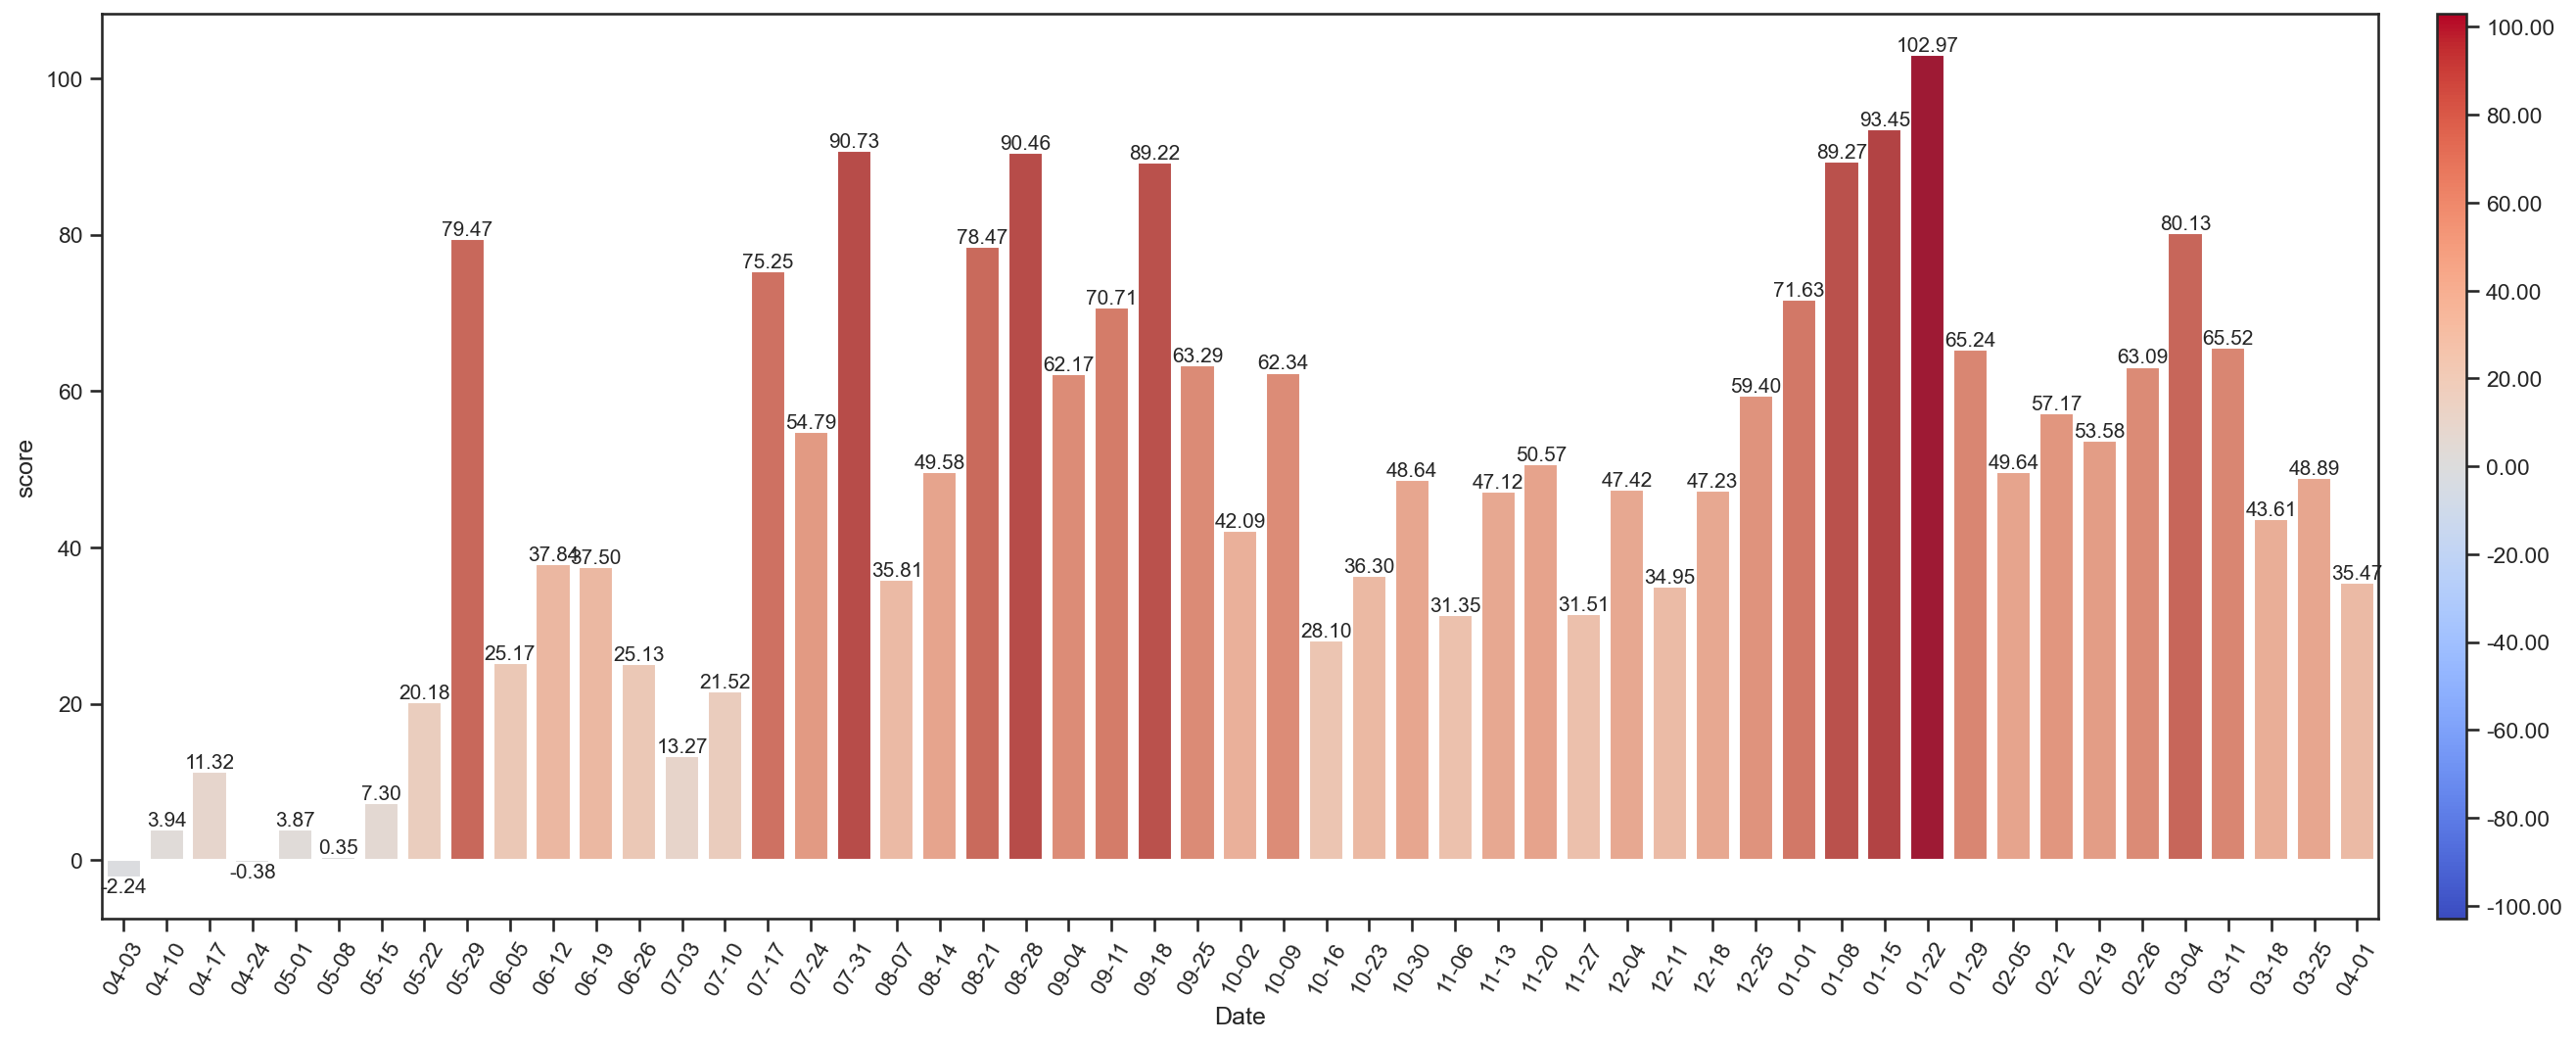

In [40]:
totSenScore0 = weekTotSenScore(dfEs[0])

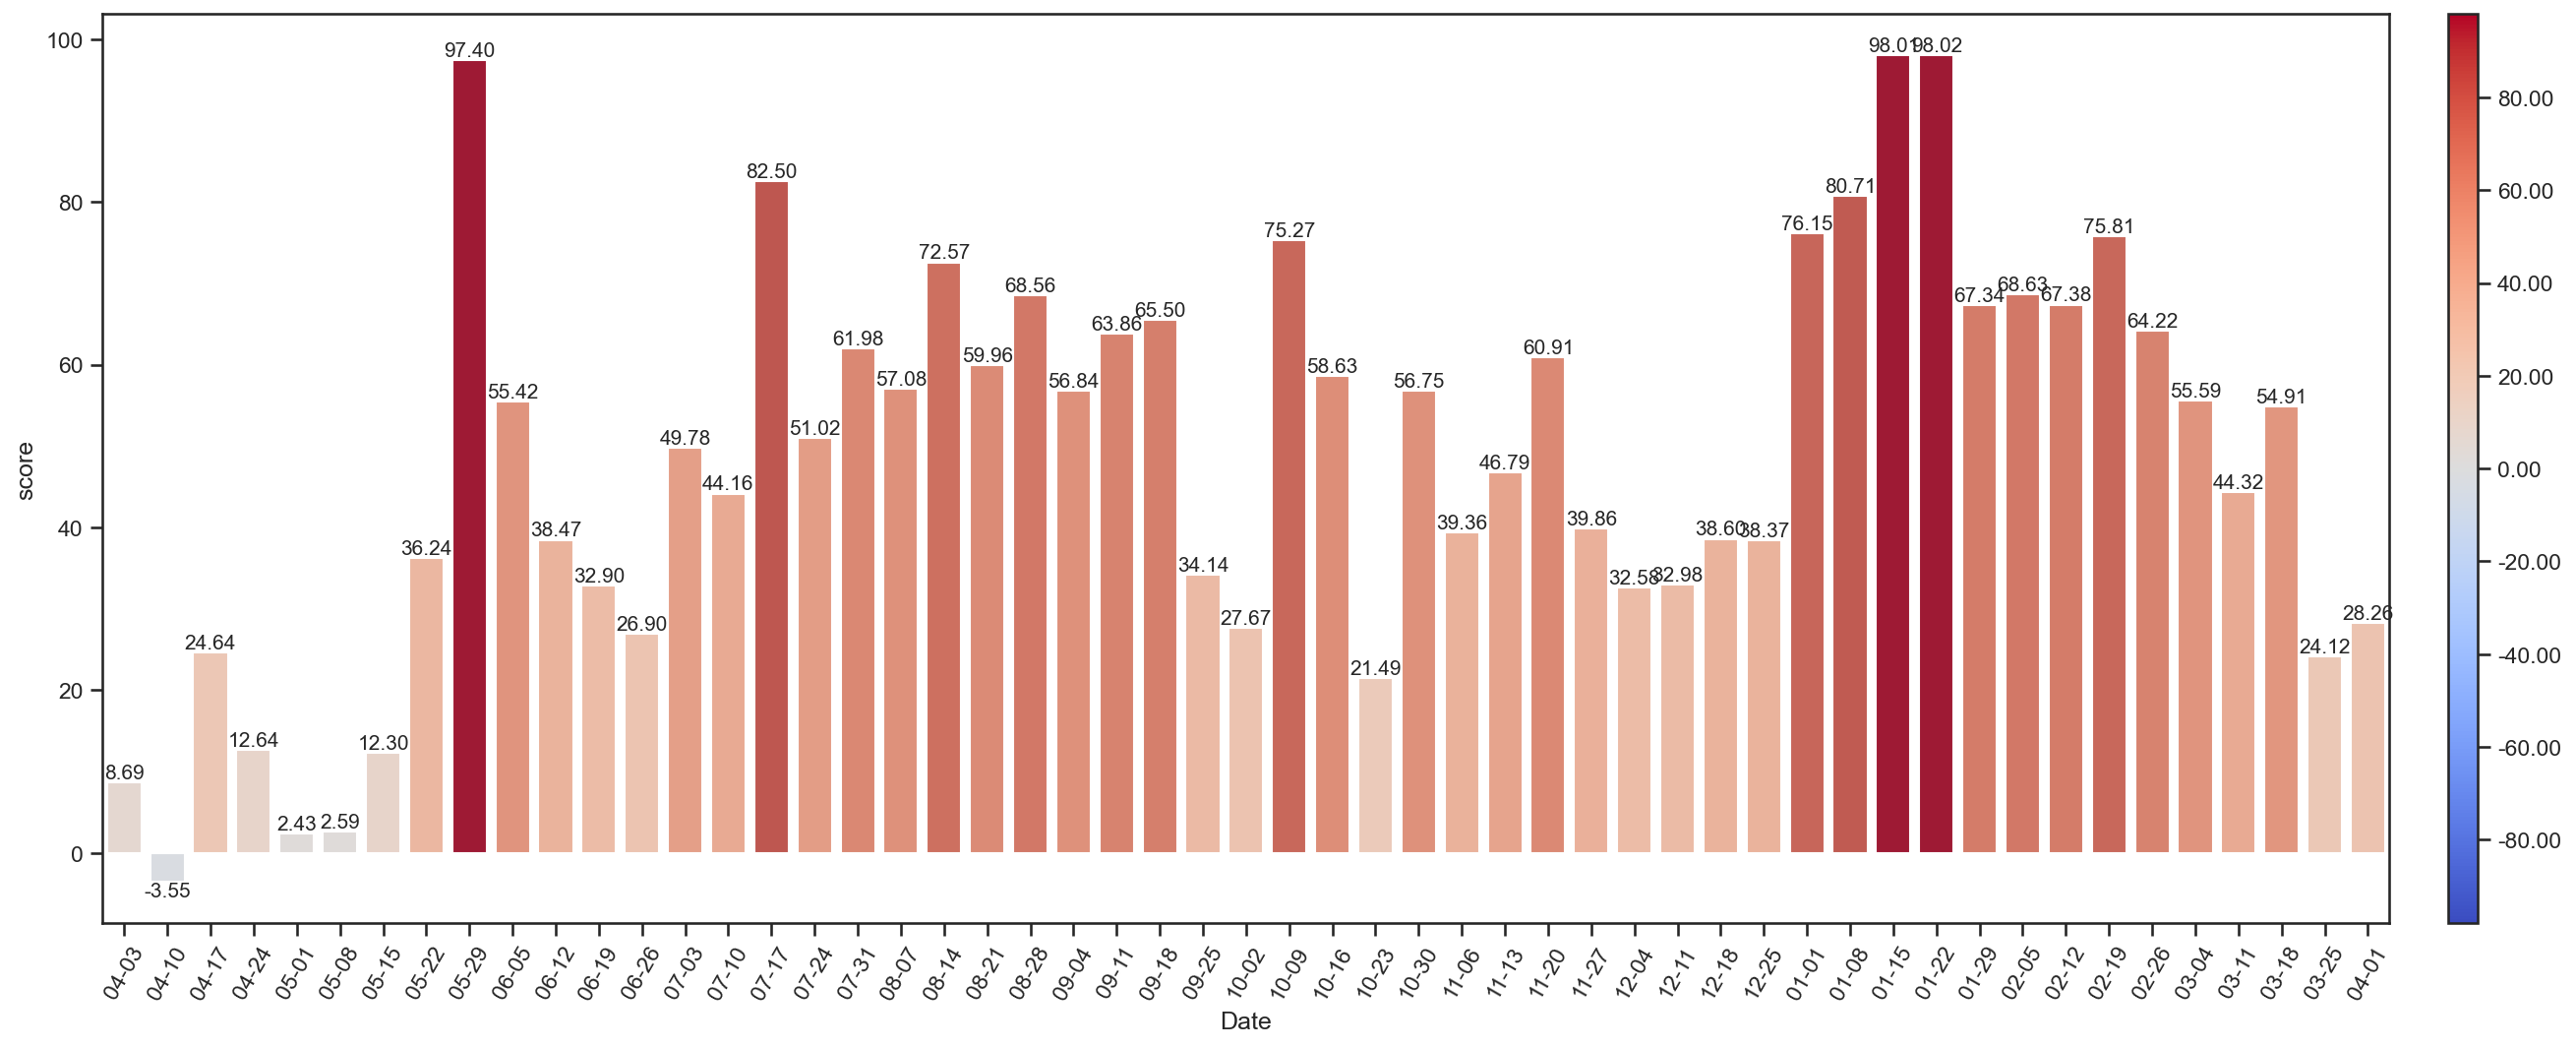

In [41]:
totSenScore1 = weekTotSenScore(dfEs[1])

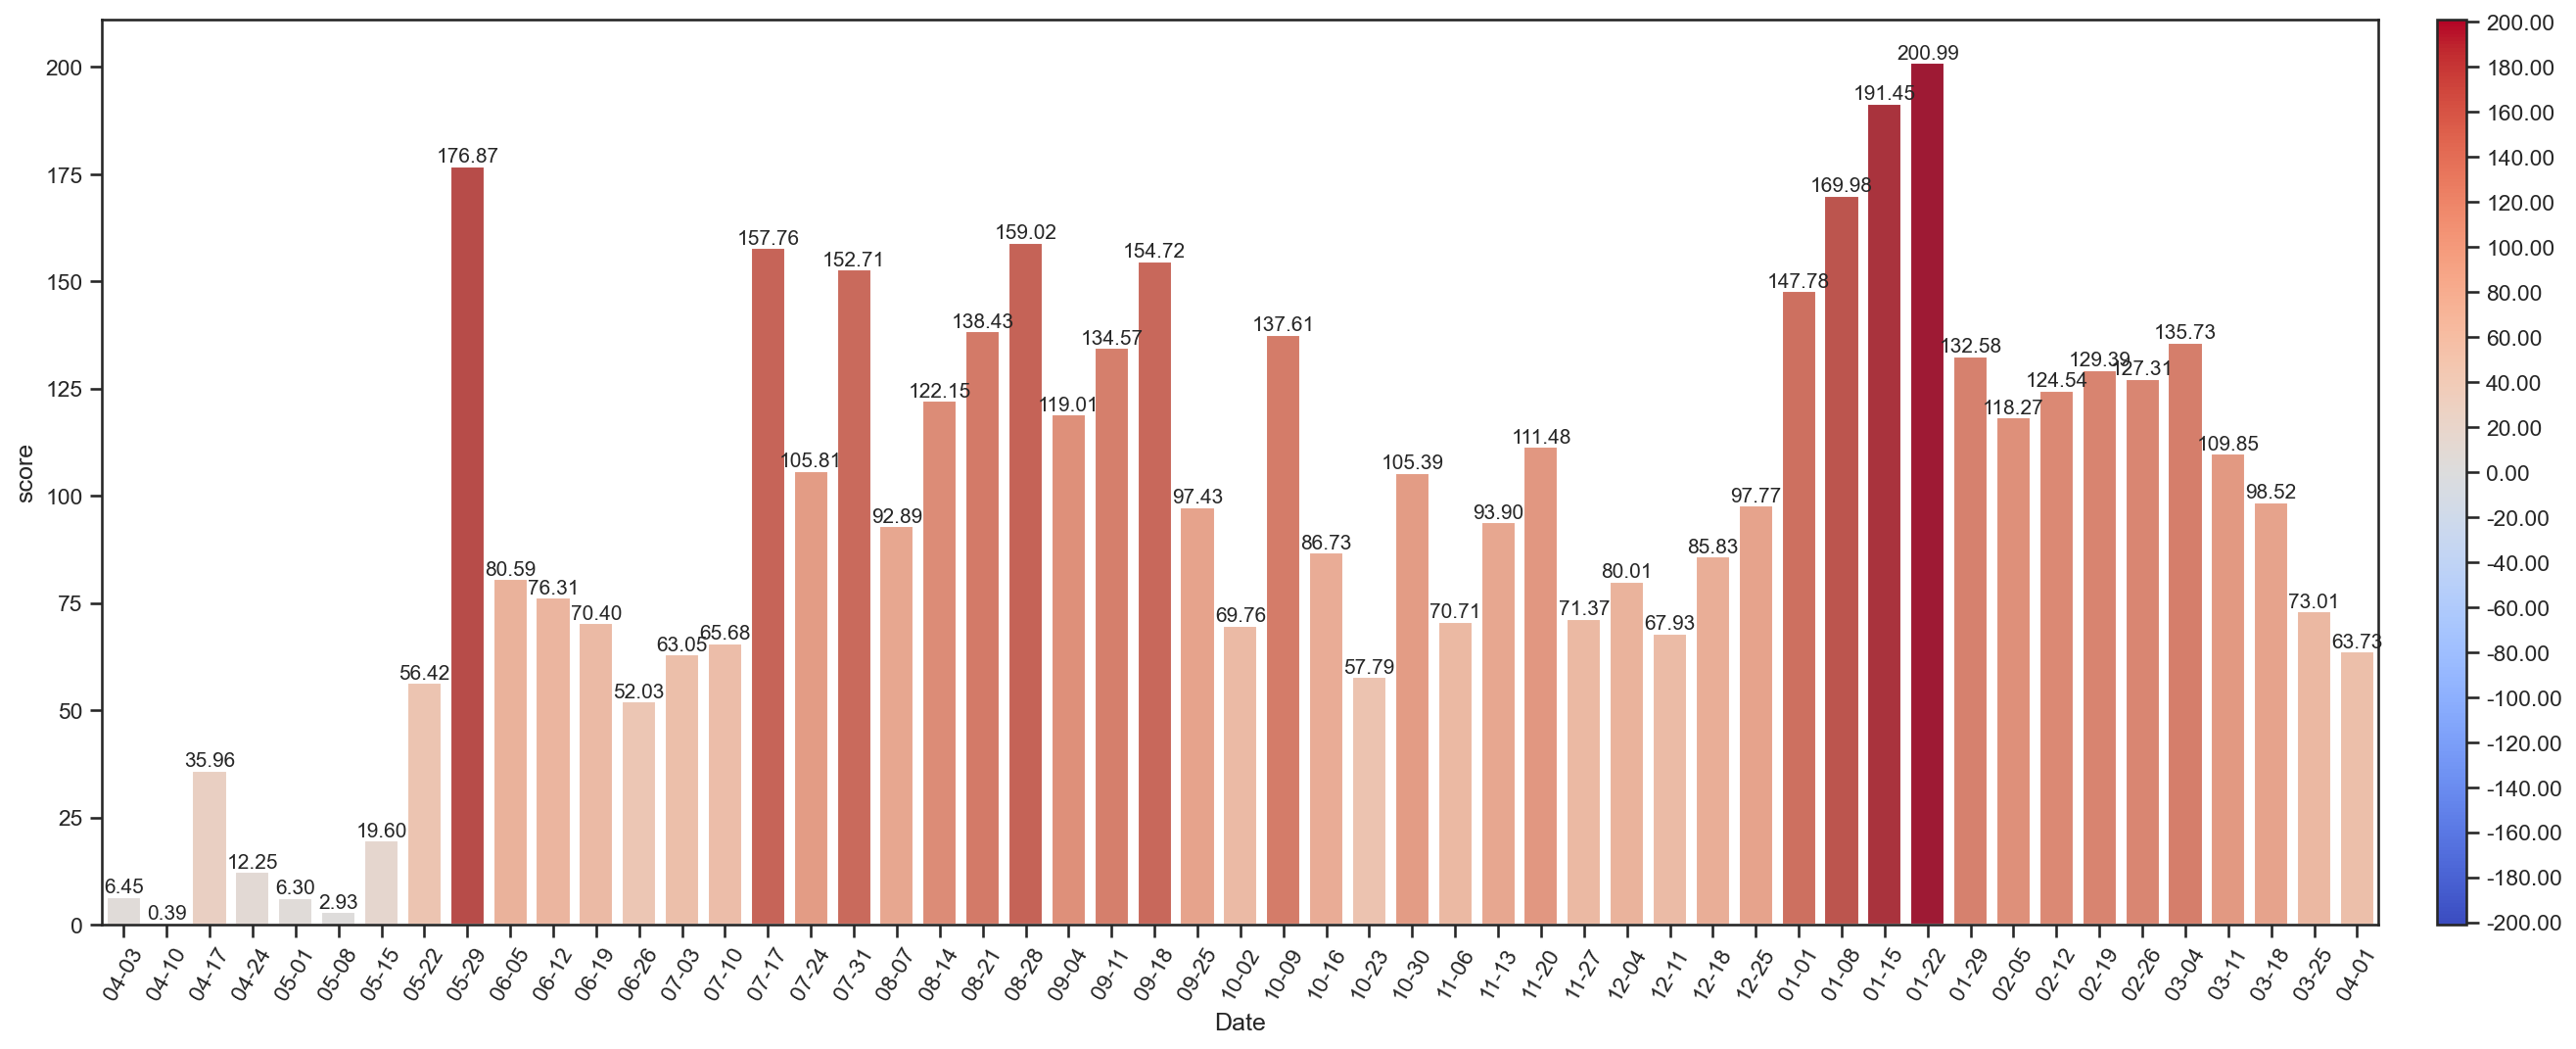

In [42]:
_ = weekTotSenScore(dfE)

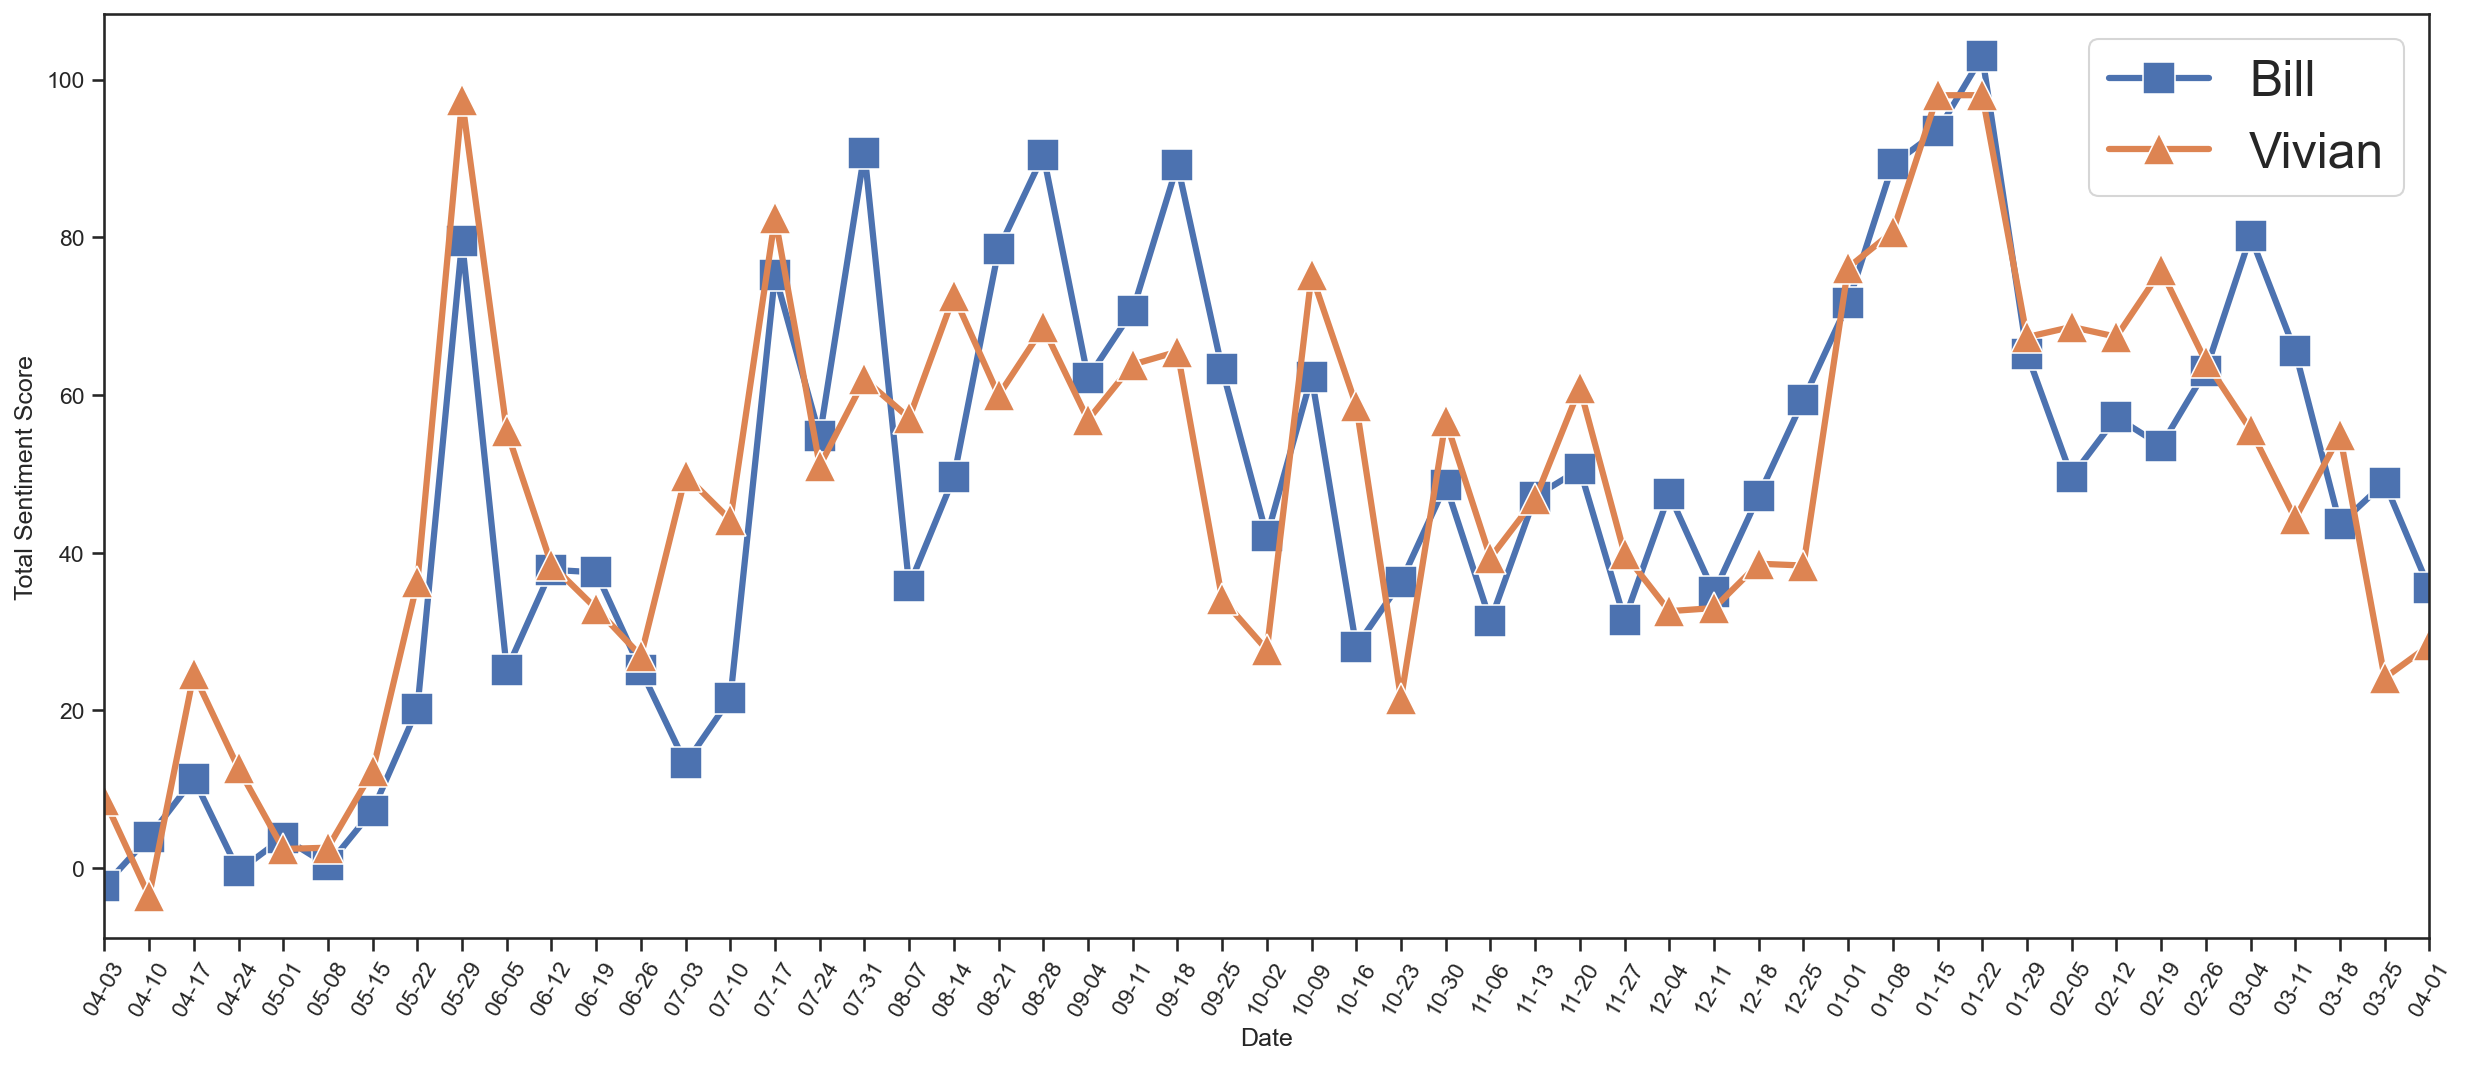

In [43]:
ax = sns.lineplot(data=totSenScore0, linewidth=3, marker="s", markersize=15, label=labels[0])
ax = sns.lineplot(data=totSenScore1, linewidth=3, marker="^", markersize=15, ax=ax, label=labels[1])

ax.set_xlabel("Date")
plt.xticks(rotation=60)
ax.set_ylabel("Total Sentiment Score")
ax.set_xlim(0, 52)
ax.legend(prop={"size": 24})

ax.figure.set_size_inches(20, 8)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊØèÊó•Âπ≥ÂùáÊÉÖÊÑüÂàÜÊûê

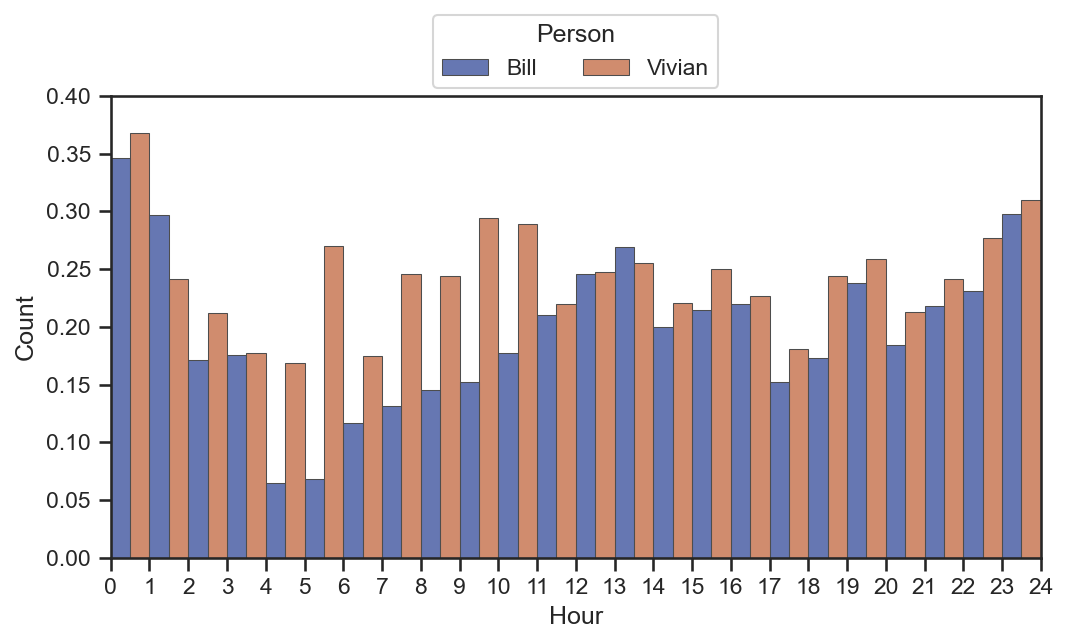

In [44]:
grouper = pd.Grouper(key="hour")

data = []
for k in range(2):
    tmp = dfEs[k].groupby(grouper)["score"].mean().sort_index()
    for i in range(24):
        if i in tmp.index:
            data.append(tmp[i])
        else:
            data.append(0)
    data.append(0)
data = pd.DataFrame(
    {
        "Score": data,
        "Person": [labels[0]] * 25 + [labels[1]] * 25,
    }
)

xBins = [i for i in range(25)]
ax = sns.histplot(
    data=data,
    x=xBins * 2,
    bins=xBins,
    weights="Score",
    hue="Person",
    multiple=multiple,
    edgecolor=".3",
    linewidth=0.5,
    palette="dark",
    alpha=0.6,
)

ax.set_xticks(range(25))
ax.set_xticklabels(range(25))
ax.set_xlabel("Hour")
ax.set_xlim(0, 24)
ax.set_ylim(np.min([0, np.floor(data["Score"].min() / 0.05) * 0.05]), np.ceil(data["Score"].max() / 0.05) * 0.05)
sns.move_legend(ax, loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)

ax.figure.set_size_inches(8, 4)
ax.figure.set_dpi(150)
plt.show()
plt.close()

### ÊØèÊó•Á¥ØËÆ°ÊÉÖÊÑüÂàÜÊûê

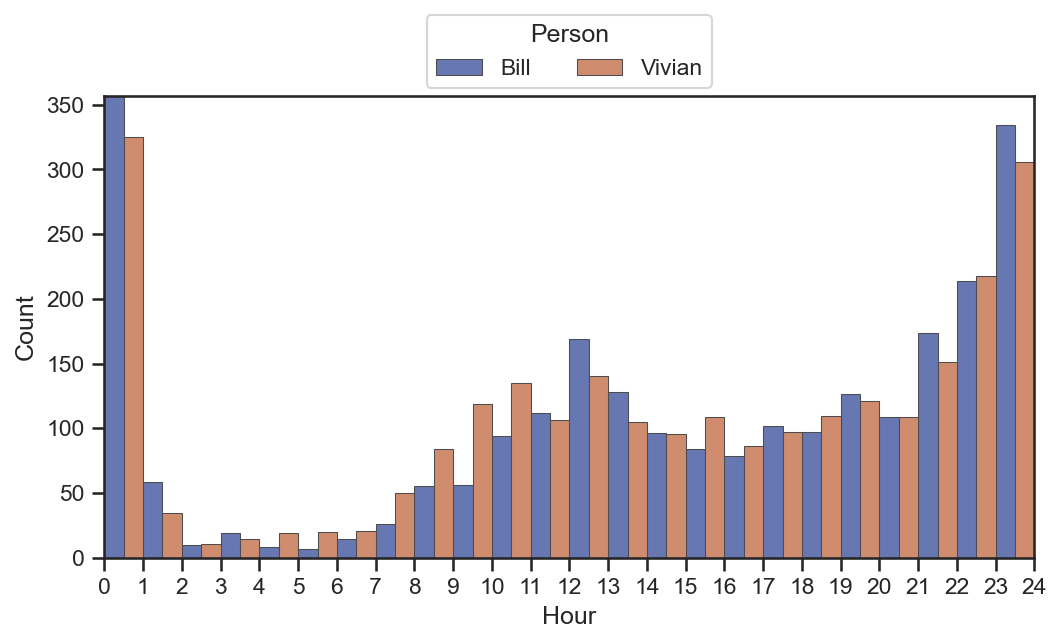

In [45]:
grouper = pd.Grouper(key="hour")

data = []
for k in range(2):
    tmp = dfEs[k].groupby(grouper)["score"].sum().sort_index()
    for i in range(24):
        if i in tmp.index:
            data.append(tmp[i])
        else:
            data.append(0)
    data.append(0)
data = pd.DataFrame(
    {
        "Score": data,
        "Person": [labels[0]] * 25 + [labels[1]] * 25,
    }
)

xBins = [i for i in range(25)]
ax = sns.histplot(
    data=data,
    x=xBins * 2,
    bins=xBins,
    weights="Score",
    hue="Person",
    multiple=multiple,
    edgecolor=".3",
    linewidth=0.5,
    palette="dark",
    alpha=0.6,
)

ax.set_xticks(range(25))
ax.set_xticklabels(range(25))
ax.set_xlabel("Hour")
ax.set_xlim(0, 24)
ax.set_ylim(np.min([0, np.floor(data["Score"].min() / 0.05) * 0.05]), np.ceil(data["Score"].max() / 0.05) * 0.05)
sns.move_legend(ax, loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)

ax.figure.set_size_inches(8, 4)
ax.figure.set_dpi(150)
plt.show()
plt.close()